In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform



In [2]:
train_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/ICAd15_schfd100/ConvTransformer/train_ground_truth.npy")
test_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/ICAd15_schfd100/ConvTransformer/test_ground_truth.npy")


In [28]:
num_subj = int(train_Target.shape[0] / 2)

corrs = np.corrcoef(train_Target)
lt = []
for i in range(num_subj):
    lt.append(corrs[i, i+int(num_subj)])

train_Target[:num_subj, :]



array([0.4042401 , 0.57710546, 0.27202523, ..., 0.20855716, 0.24875724,
       0.49298504])

In [21]:
pca = PCA(n_components=256)

pca.fit(train_Target)

PCA(n_components=256)

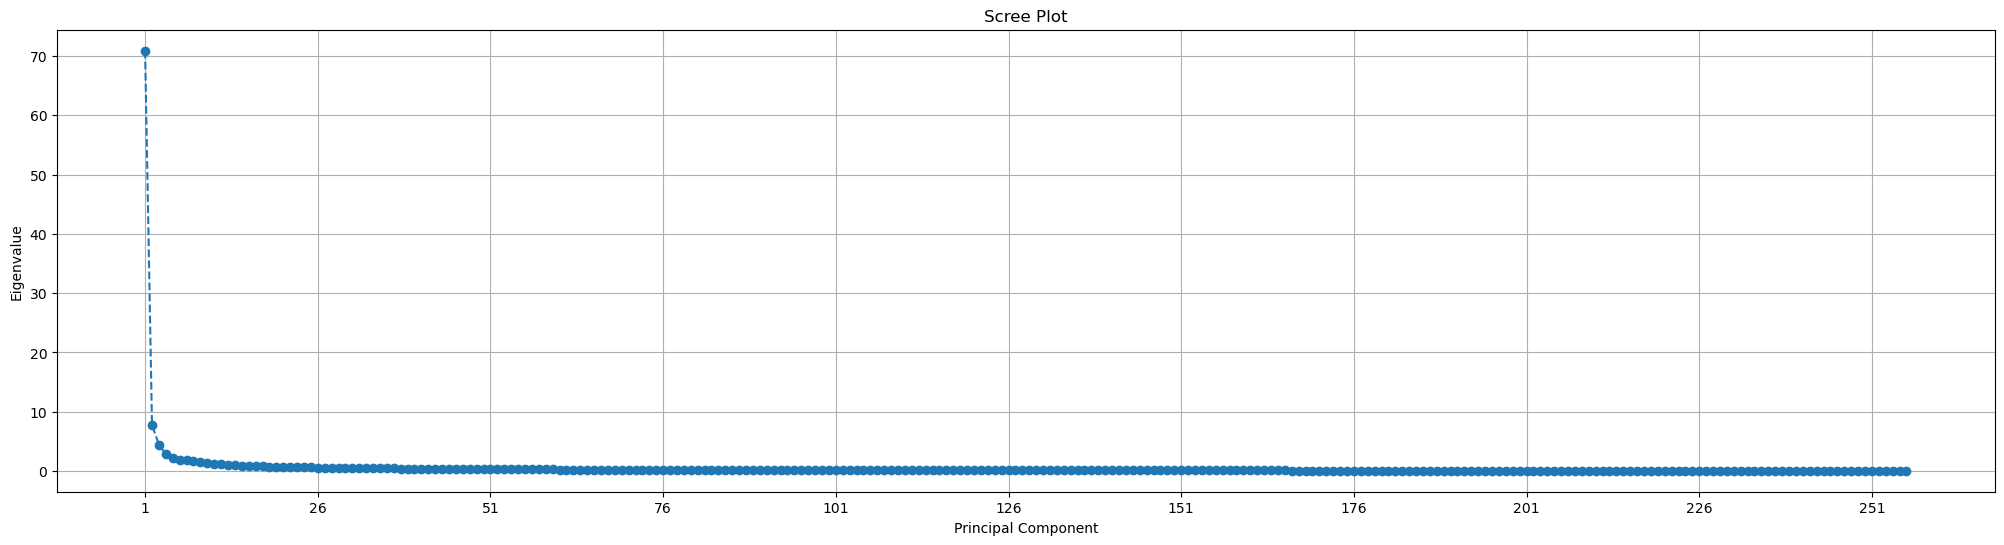

In [29]:
eigenvalues = pca.explained_variance_
# Plotting the eigenvalues
plt.figure(figsize=(25, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, len(eigenvalues) + 1, 25))
plt.grid(True)
plt.show()

In [24]:
train_transform = pca.transform(train_Target)
train_pred = pca.inverse_transform(train_transform)

test_transform = pca.transform(test_Target)
test_pred = pca.inverse_transform(test_transform)

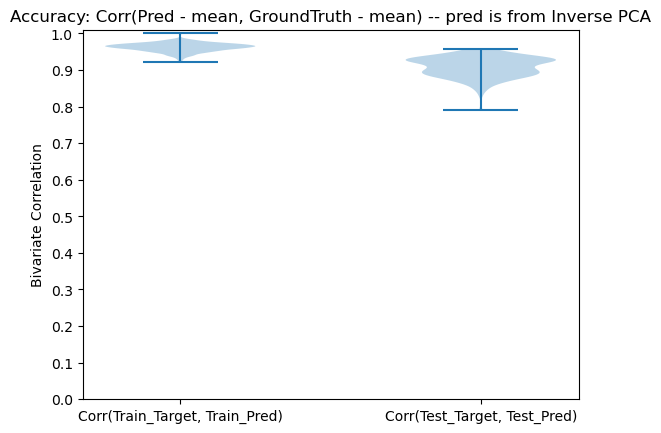

In [25]:
test_mean = np.mean(test_Target, axis=0)
train_mean = np.mean(train_Target, axis=0)


test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :] - test_mean, test_pred[i, :] - test_mean)
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :] - train_mean, train_pred[i, :] - train_mean)
    train_corrs.append(corr[0,1])
'''

test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :], test_pred[i, :])
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :], train_pred[i, :])
    train_corrs.append(corr[0,1])
'''

plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Accuracy: Corr(Pred - mean, GroundTruth - mean) -- pred is from Inverse PCA")
plt.show()

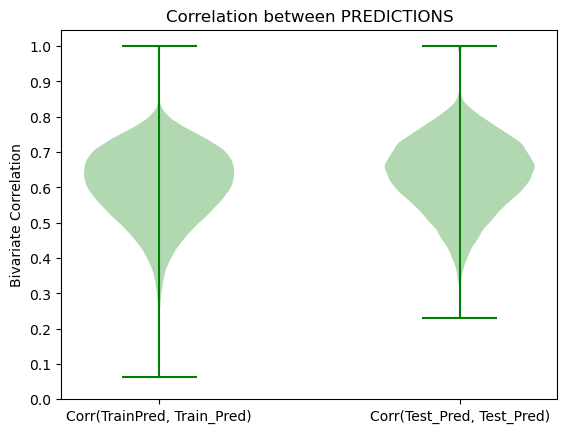

In [26]:
corr = np.corrcoef(train_pred)
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(test_pred)
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

violin = plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
for pc in violin['bodies']:
    pc.set_facecolor("green")
    
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor('green')


plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Correlation between PREDICTIONS")
plt.show()

In [56]:
def make_netmat(data, netmat_dim=100):
    '''
    Makes netmat from upper triangle in numpy
    '''
    sing_sub = int((netmat_dim * (netmat_dim-1))/2)

    # get indeces of upptri cause all these vec netmats are upper trinagles. 
    out_mat_init = np.ones(2*sing_sub+netmat_dim).reshape(netmat_dim,netmat_dim)

    inds_uptri = np.triu_indices_from(out_mat_init,k=1) # k=1 means no diagonal?
    inds_lowtri = np.tril_indices_from(out_mat_init,k=-1) # k=1 means no diagonal?
   
    out_mat_val = out_mat_init
    out_mat_val[inds_lowtri] = data
    out_mat_init[inds_uptri] = out_mat_init.T[inds_uptri]

    return out_mat_init

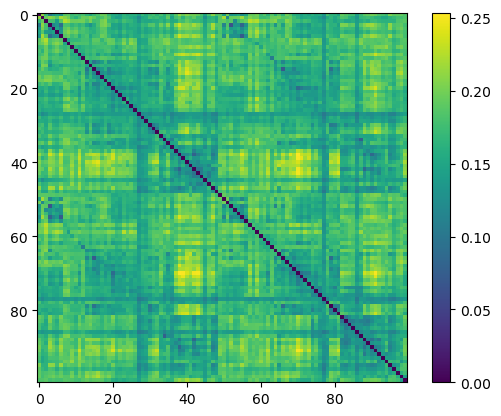

In [57]:
var = np.std(train_Target, axis=0)
plt.imshow(make_netmat(var) - np.identity(100))
plt.colorbar()

Mean distance: 0.17342943111329798


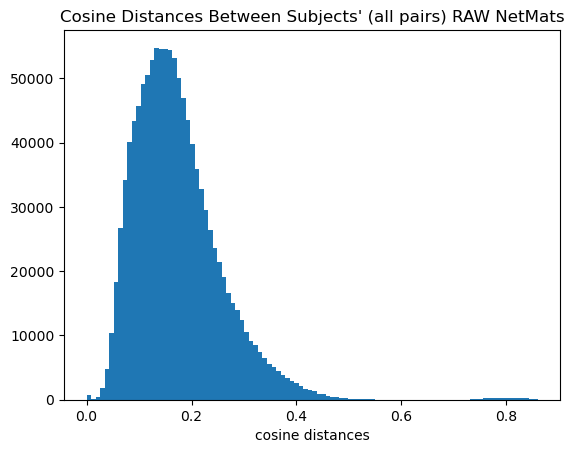

In [58]:
distances = pdist(train_Target, metric='cosine')

print(f"Mean distance: {np.mean(distances)}")
plt.hist(distances, bins=100)
plt.title("Cosine Distances Between Subjects' (all pairs) RAW NetMats")
plt.xlabel("cosine distances")
plt.show()


Mean distance: 0.9983732852872301


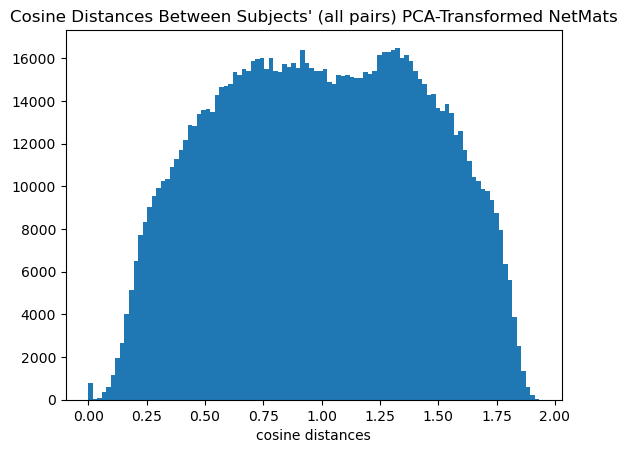

In [59]:
distances = pdist(train_transform, metric='cosine')

print(f"Mean distance: {np.mean(distances)}")
plt.hist(distances, bins=100)
plt.title("Cosine Distances Between Subjects' (all pairs) PCA-Transformed NetMats")
plt.xlabel("cosine distances")
plt.show()


In [50]:
train_transform.shape


(1524, 256)

# MESHES PCA


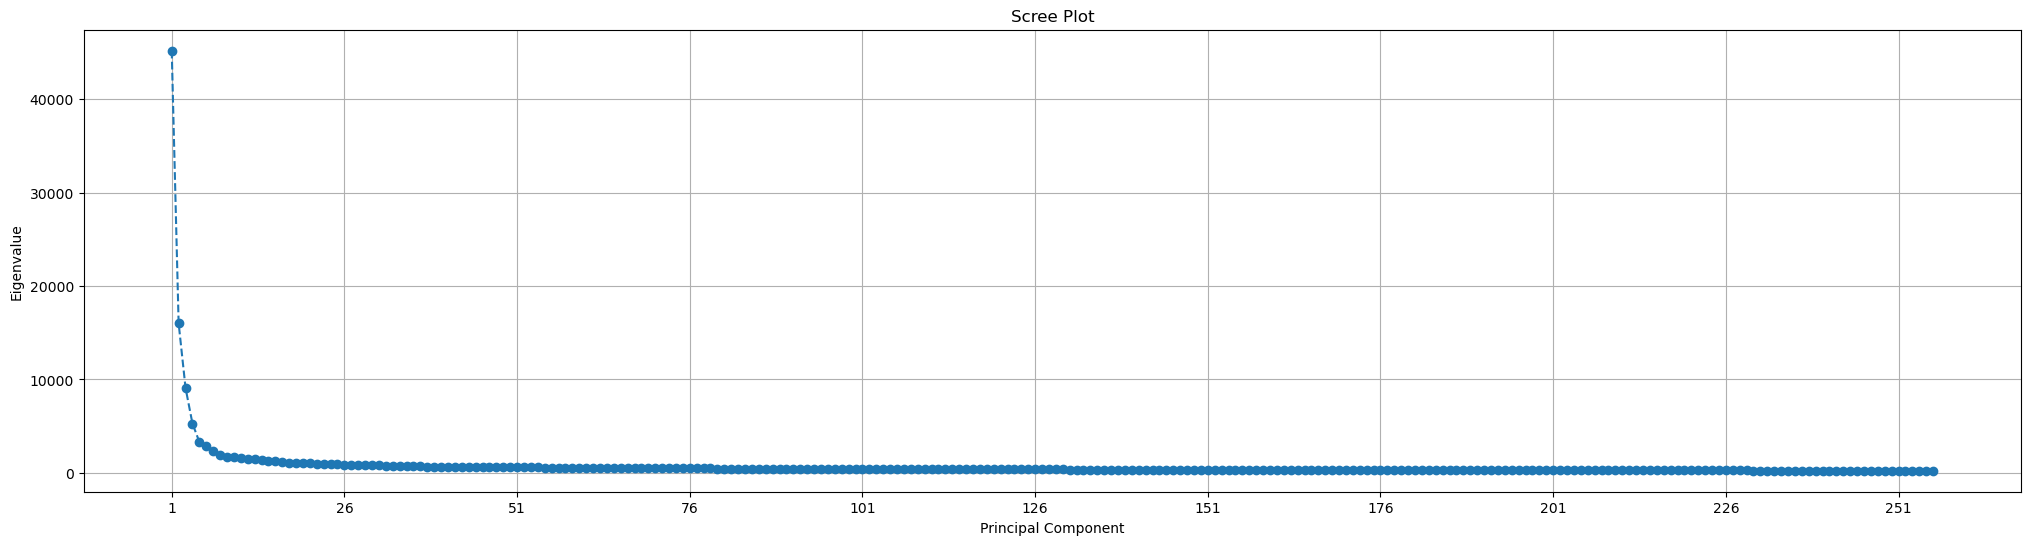

In [44]:
# 256 Component PCA
eigenvalues = [
    45173.81132463,
    16009.10763576,
    9093.00528717,
    5278.91303407,
    3312.40703073,
    2860.66881298,
    2358.34250756,
    1933.40827644,
    1748.14626862,
    1733.67981985,
    1575.39813626,
    1518.72390417,
    1452.44144984,
    1340.59465268,
    1296.27747094,
    1232.67084274,
    1130.0204689,
    1098.1062649,
    1049.36683987,
    1027.50881883,
    1010.90425065,
    971.29243046,
    952.07484378,
    908.18624754,
    896.20583637,
    858.13926806,
    844.41517058,
    818.57443929,
    814.29272508,
    799.39865677,
    786.09144413,
    756.89826096,
    752.76984988,
    739.97095676,
    725.70477746,
    702.31771706,
    684.43569698,
    676.30331935,
    670.64134124,
    657.52981302,
    653.36726819,
    643.1296112,
    636.90561291,
    628.74487587,
    622.98783984,
    613.44807082,
    610.80392334,
    599.2637019,
    594.97984898,
    591.65640773,
    586.87397289,
    583.62754124,
    578.61519091,
    574.95216784,
    570.3568433,
    556.73792268,
    553.38765232,
    549.65414611,
    546.30024623,
    540.57841025,
    535.78008624,
    527.62469451,
    521.53813399,
    519.86783655,
    517.54012816,
    513.69859963,
    511.36777802,
    503.35655934,
    502.49697924,
    498.88201674,
    490.27210488,
    488.63485325,
    486.55629977,
    482.968282,
    481.27900714,
    476.0256975,
    471.66522159,
    469.0817863,
    465.77743672,
    463.17170255,
    458.41554178,
    455.10852885,
    452.34033443,
    449.50110938,
    446.06335902,
    443.69194936,
    440.58175696,
    438.06424755,
    435.33238588,
    432.63838291,
    431.38485115,
    430.42651042,
    429.34779284,
    425.62063258,
    424.71863442,
    420.64671183,
    418.17558985,
    417.1868631,
    415.73025157,
    411.43316805,
    409.79691656,
    408.36897672,
    406.28519195,
    405.61285165,
    402.08883408,
    401.58507766,
    399.43795853,
    397.35123103,
    395.37754305,
    393.94637088,
    392.31775817,
    390.118344,
    387.62057417,
    385.13226467,
    384.78610519,
    381.34900387,
    378.99766036,
    378.56625151,
    375.85018465,
    373.63661068,
    372.66511806,
    371.9278928,
    371.07726345,
    368.78099266,
    367.34711502,
    365.98500224,
    363.48944699,
    360.67825126,
    359.34450642,
    358.54609015,
    356.24580662,
    354.78924179,
    353.40088665,
    352.65299113,
    350.74391425,
    348.77211707,
    347.47777339,
    346.74203755,
    346.55830338,
    344.9788191,
    343.11619671,
    340.99765363,
    340.80453728,
    339.41499341,
    337.84516998,
    336.80636671,
    333.80317483,
    333.11834718,
    331.78953053,
    330.39309828,
    329.65967254,
    327.58652174,
    326.55256002,
    325.11742834,
    323.92328611,
    323.80570675,
    323.23472108,
    322.2295396,
    321.01876246,
    319.57722815,
    319.2215451,
    317.99522114,
    316.0662102,
    314.98463618,
    314.33685288,
    313.59514987,
    311.17778417,
    310.51012633,
    309.17536848,
    308.28164645,
    307.71261334,
    307.27477515,
    305.74035863,
    304.46204384,
    303.14439005,
    302.42688607,
    301.64593185,
    300.36221024,
    298.9160777,
    298.69935956,
    298.03466331,
    296.68107253,
    294.83457599,
    293.3951394,
    292.41150738,
    291.11078814,
    290.22510359,
    288.93586786,
    287.82801727,
    287.20622654,
    286.54222208,
    286.18034056,
    284.2587553,
    283.49662278,
    283.09944961,
    282.4036549,
    281.3281213,
    280.86157287,
    280.27793113,
    279.08501219,
    278.15842392,
    276.23926708,
    275.43314953,
    275.11829927,
    273.40890276,
    272.0062889,
    271.01464851,
    269.8370515,
    269.47605818,
    268.26631958,
    267.96655531,
    265.37171371,
    265.02619845,
    264.51774626,
    264.21750291,
    263.01253451,
    261.40740639,
    260.32206657,
    259.90124123,
    259.22964281,
    258.47703841,
    257.26182574,
    256.22434528,
    255.76331957,
    254.77372184,
    254.65639449,
    253.57863849,
    252.15631696,
    252.02017383,
    250.14406234,
    249.78285197,
    249.13100016,
    248.02161359,
    247.69604702,
    247.17771938,
    246.49619859,
    245.26123963,
    244.35366271,
    243.50996394,
    242.29629456,
    241.73663869,
    240.25872341,
    239.33532846,
    238.72408175,
    236.92563532,
    236.55739587,
    236.17741987,
    234.71351238,
    233.13968117,
    232.813483,
    232.32793081,
    231.09123678,
    230.46658705,
    229.03791794,
    228.55398777,
    227.18716185,
]

# Plotting the eigenvalues
plt.figure(figsize=(25, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker="o", linestyle="--")
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.xticks(np.arange(1, len(eigenvalues) + 1, 25))
plt.grid(True)
plt.show()

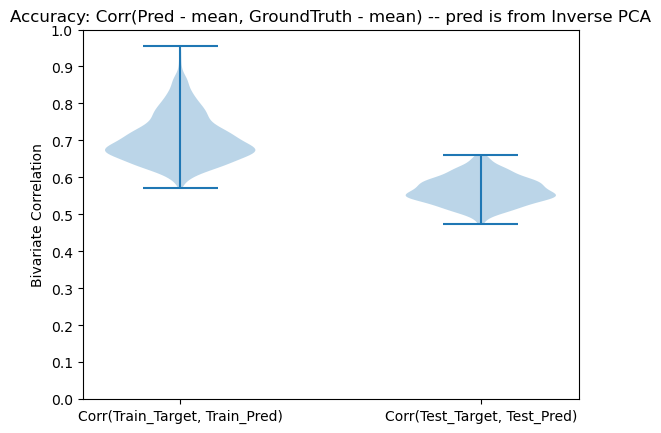

In [46]:
# 256 Component PCA
train_corrs = [
    0.6353142616038453,
    0.6685013972392467,
    0.6918908399355498,
    0.7165178849880043,
    0.6813872527486248,
    0.8113108866277727,
    0.6280474461147513,
    0.692061378309504,
    0.7169311222640053,
    0.7825800555128588,
    0.6368408631241295,
    0.6966393168538385,
    0.5999764589096109,
    0.6886870752410372,
    0.6880866314243278,
    0.6830079975399832,
    0.7118788808971328,
    0.7349898036776021,
    0.7978104371160871,
    0.7159646689865846,
    0.6348443441285446,
    0.7153370210275963,
    0.8120219576231014,
    0.6259521634524196,
    0.7165833367509845,
    0.8147534238026513,
    0.749655604530106,
    0.7244856720431077,
    0.586549012767197,
    0.6993781431821497,
    0.6073671553707131,
    0.6393272637580121,
    0.7565341796150888,
    0.8004177564680626,
    0.797631354097381,
    0.6897081577404898,
    0.8632386003894837,
    0.7267713743504093,
    0.665696541192898,
    0.6731732182213221,
    0.6798224414253369,
    0.85983410979353,
    0.6758536334120301,
    0.7318094397611961,
    0.6946398964535749,
    0.9230304664600678,
    0.7156922244607905,
    0.6625916118012376,
    0.7206255901827858,
    0.6381571448342681,
    0.6762225451725712,
    0.746530649451196,
    0.7231494906669328,
    0.66224846349207,
    0.7908021922139667,
    0.6491223846428493,
    0.6767352137076569,
    0.6550001647643211,
    0.6649762551772528,
    0.6602022406643642,
    0.626370177262027,
    0.7771341133993631,
    0.7634048975553143,
    0.6923494591270989,
    0.8574969937321372,
    0.7240814144634767,
    0.6712618606674783,
    0.6426899562426767,
    0.6402926326709885,
    0.6573698106735694,
    0.76674677380648,
    0.7766123679990512,
    0.7360125494904556,
    0.6577719313520078,
    0.7756039364806921,
    0.6261025020078034,
    0.7164976697362875,
    0.6698816795753646,
    0.6188272455442982,
    0.8176879103708593,
    0.6870744651053766,
    0.696562480967467,
    0.655518473300721,
    0.7387014723714269,
    0.7550283987816467,
    0.6519860290690774,
    0.6903857381907269,
    0.711488492199604,
    0.7722866026274231,
    0.7776518740521985,
    0.7468678681190354,
    0.6332764896909577,
    0.7542359273232034,
    0.7007409641622946,
    0.7154512050494141,
    0.6787406287147333,
    0.596842832997286,
    0.7314153323173382,
    0.7625272051715452,
    0.6199897001665898,
    0.7761433877204594,
    0.6857371456198367,
    0.7609452517337814,
    0.6427115906564443,
    0.8321674597045319,
    0.7644719764058774,
    0.8264977545346831,
    0.8274881550763037,
    0.7291232649507935,
    0.7453443040206873,
    0.6644816959371673,
    0.673066824077667,
    0.727183775910411,
    0.6726292996545261,
    0.6130952398347524,
    0.6331412185232231,
    0.7157545548005828,
    0.6901169503353016,
    0.6889207196194957,
    0.7630278326860366,
    0.7917447333277474,
    0.7777667540578604,
    0.6611633253492198,
    0.5971743524452652,
    0.6116792067852204,
    0.5844863726768015,
    0.674434864996159,
    0.7207530822616917,
    0.7108686003911465,
    0.6831295095805227,
    0.6952725016058479,
    0.8068158867447994,
    0.7033980819536455,
    0.7003025162029618,
    0.7817696496266004,
    0.8479712565538073,
    0.6265422125693149,
    0.7437103690991234,
    0.7227064630621519,
    0.7144304655637348,
    0.6373666073938667,
    0.8734081681499732,
    0.6623597759425832,
    0.6788987921419727,
    0.6789399957720521,
    0.6499772820534012,
    0.6974443442492523,
    0.6701504828587886,
    0.6715517981364295,
    0.652653723662703,
    0.8406072362508421,
    0.7635887228761347,
    0.6223715418852843,
    0.640863325769789,
    0.6911002268537554,
    0.6746800280403816,
    0.6415072768511056,
    0.794967585131729,
    0.646112358589227,
    0.7491920863302031,
    0.6066160714709116,
    0.6716102722013596,
    0.6163572538458209,
    0.688662643344027,
    0.7094165281997029,
    0.7227046869010538,
    0.6592464155932942,
    0.8668073972915022,
    0.6691116552799348,
    0.8330666964519821,
    0.7084679195954822,
    0.7155508999151086,
    0.6674223299964379,
    0.7499524668812476,
    0.6204848262040914,
    0.6408819549971931,
    0.9011277608757439,
    0.6270986922443794,
    0.891758106752735,
    0.6605380947059724,
    0.7728311988171856,
    0.6016642696004334,
    0.6528508002994293,
    0.7618037250206311,
    0.7898322430291183,
    0.6818095230179865,
    0.6713937811314907,
    0.6305866299790267,
    0.6701421210312993,
    0.7276737085867653,
    0.7238121488334234,
    0.6997942025830102,
    0.6923319903009271,
    0.6923577767010943,
    0.8377995842970687,
    0.7454581384953712,
    0.6817443727243901,
    0.6721106397637594,
    0.7404453718781766,
    0.7562984290586632,
    0.6697595282386785,
    0.6556210852944993,
    0.7481860163706948,
    0.6172036818139954,
    0.6773226887405779,
    0.7287231690896011,
    0.6810730047147114,
    0.6643205089258879,
    0.6392213820150021,
    0.6928312764737361,
    0.6740573458486461,
    0.662645127018974,
    0.7883454110778425,
    0.7092499579833795,
    0.6863623002198124,
    0.6594335022354246,
    0.6682951978053483,
    0.6962137762020469,
    0.7059658315523769,
    0.6716467043909189,
    0.6254139051492921,
    0.6676141960041908,
    0.6227592980383733,
    0.9092125235881329,
    0.7747477842459229,
    0.8099196424068099,
    0.7334117110156475,
    0.7218088510744477,
    0.7681403064774207,
    0.7075144352173378,
    0.778336436861305,
    0.6930925960750172,
    0.6640208181186547,
    0.8613819884049395,
    0.6703232199802283,
    0.7073984483569307,
    0.6854056626010233,
    0.7104740038259563,
    0.7006764296256501,
    0.6664592411535631,
    0.621225565504032,
    0.7189769797494927,
    0.7811529031410067,
    0.6166454404332016,
    0.8589195718163527,
    0.8437308231867128,
    0.6811259911420053,
    0.7349981610398466,
    0.6579458125584462,
    0.7772764182345839,
    0.7684771519946161,
    0.6345148309888008,
    0.6975827633054821,
    0.6278651284520395,
    0.78568535656869,
    0.7948061490628829,
    0.6546764226377233,
    0.686473169070618,
    0.5911317764229757,
    0.8127750159688497,
    0.8817680117783825,
    0.6726614853015317,
    0.7669156032040373,
    0.7140170073051936,
    0.7546948979737396,
    0.6565728890150934,
    0.8696511047934499,
    0.6408242760077362,
    0.6623317109766717,
    0.7569382382025039,
    0.677485327834709,
    0.6748890924985848,
    0.7809257143225168,
    0.8179047247640848,
    0.680412036668805,
    0.7642828566852452,
    0.6302237397054784,
    0.6380562364700971,
    0.7909923627408623,
    0.6138013353572099,
    0.8405964471522768,
    0.6284841853963176,
    0.6146453155741373,
    0.6935313177470744,
    0.6755079581912705,
    0.6770909969671121,
    0.7045435236865365,
    0.7210627058737397,
    0.7728686604925749,
    0.6925638354246835,
    0.6295927782227749,
    0.8154979810502101,
    0.6845674586724552,
    0.6463392150351822,
    0.6548006364123742,
    0.8464863216956803,
    0.6734279754486888,
    0.7057880908350651,
    0.7697616486424411,
    0.6347524971091196,
    0.6170669024878224,
    0.7069536918965291,
    0.6641640813484377,
    0.804773381338612,
    0.8146817264495515,
    0.7275907436502886,
    0.6123766702400872,
    0.6867067549414151,
    0.6995362207927209,
    0.6939173700932958,
    0.6380134291315953,
    0.6338172188129972,
    0.6370504221946041,
    0.6135903204787683,
    0.7673422160546717,
    0.8161077409287617,
    0.6223621794215244,
    0.6971685469040504,
    0.6650676161078737,
    0.6418219307193151,
    0.6767079771851302,
    0.7305748628903695,
    0.7181131250684658,
    0.7272707943661448,
    0.7091773607895296,
    0.5959039127585394,
    0.7758506080276588,
    0.8024331621819232,
    0.7870649494634657,
    0.6374226942947124,
    0.6582875321616929,
    0.7547407725358505,
    0.806178145578277,
    0.6065812966917231,
    0.6336353022428086,
    0.7678665586925808,
    0.7335866181080101,
    0.6839433535888066,
    0.6376694150701585,
    0.7989899547289352,
    0.6837148726220854,
    0.8016377171781813,
    0.7601935976700089,
    0.6982029986986171,
    0.7811169709910604,
    0.7045099451868276,
    0.6846534726966508,
    0.7644513734005054,
    0.6915703560888755,
    0.6521019644537867,
    0.6952772589333541,
    0.6657128510815703,
    0.7234675401951686,
    0.6097652332481989,
    0.7381093477730586,
    0.6645119338356402,
    0.8177050312672084,
    0.6724213345956436,
    0.782522594297184,
    0.7344883553933035,
    0.7676174104565825,
    0.7159344131775175,
    0.6568310605982334,
    0.6203403505664209,
    0.7091636744990615,
    0.7963008084848456,
    0.7530865519733763,
    0.6742278257129822,
    0.6258756397564528,
    0.6594467778089755,
    0.6580111254864988,
    0.6576940160974758,
    0.6304913637160423,
    0.6858170233279454,
    0.7039074310848868,
    0.6935591362024115,
    0.6874677499784964,
    0.6733397127751809,
    0.666427109254236,
    0.7041641708861462,
    0.703091390798508,
    0.7392445979378505,
    0.6877299110162114,
    0.8385979083125102,
    0.6666899991729386,
    0.6175006564184626,
    0.6982850720879004,
    0.7177866442419045,
    0.733408733098973,
    0.8727019344190551,
    0.6914798221271419,
    0.866099327897581,
    0.6526746991781339,
    0.725695954830163,
    0.7375691674230663,
    0.67503526709223,
    0.6941842484389561,
    0.7845223605200476,
    0.7719793794829853,
    0.7257409504829067,
    0.7219261382680147,
    0.6388622135959611,
    0.6627387471675508,
    0.6780549649187371,
    0.6771125435396353,
    0.624412294695948,
    0.6471060897138052,
    0.859356982902715,
    0.7218970881472077,
    0.7257675012616089,
    0.651831063176407,
    0.6829898148537841,
    0.6779307614624946,
    0.7514206625166941,
    0.6925699125890895,
    0.7751870536239552,
    0.732188665784119,
    0.7272727575364011,
    0.6078279505352631,
    0.6765828593882706,
    0.6613356974770075,
    0.6310706319924895,
    0.6974847974204947,
    0.6474914950001774,
    0.6410635469238969,
    0.6905767093408808,
    0.6573374703536752,
    0.7384956046639606,
    0.6607413128253111,
    0.7828854814106438,
    0.6003828535383636,
    0.7532513209171776,
    0.6757387292747257,
    0.6671925103199675,
    0.6237381594797571,
    0.6665822802769487,
    0.684602919943742,
    0.648597510343866,
    0.591465841279724,
    0.9454358226400938,
    0.7764605435350451,
    0.7103086548312607,
    0.6531523149592606,
    0.6423788676075555,
    0.831202003380219,
    0.6738436983114438,
    0.7400846542714026,
    0.7704722131617391,
    0.610416228285636,
    0.7875755787011474,
    0.6851592532963781,
    0.6341360677459652,
    0.7223751880906454,
    0.6646835168533716,
    0.7271134581953493,
    0.6683000660511632,
    0.7239715388111826,
    0.6335096957576448,
    0.6966150095383276,
    0.6124470744429177,
    0.6246013172465804,
    0.6566845675049956,
    0.7349584883642376,
    0.7191887111619372,
    0.8046924421062394,
    0.6386866490815828,
    0.709106320510192,
    0.6202090191225822,
    0.6405616061430077,
    0.6068346532456635,
    0.6620293713861258,
    0.6812918787070048,
    0.9567280193814889,
    0.657288463290319,
    0.7725107033468169,
    0.8092687800722048,
    0.6323692775341706,
    0.6593697184041117,
    0.6739949601673575,
    0.7073618101732763,
    0.665979371753117,
    0.715473174675458,
    0.6731422258865731,
    0.6673020657159443,
    0.6988090759705702,
    0.7151453001693379,
    0.7425665878201905,
    0.656234634084028,
    0.729030561052588,
    0.7181429939202378,
    0.735449309860986,
    0.7321905464805122,
    0.6275896494538414,
    0.6328325783164255,
    0.654170920196256,
    0.6812744039397391,
    0.6899959333302985,
    0.6364548382840528,
    0.6762198972033227,
    0.739279799289209,
    0.6308278796989075,
    0.6321631441074161,
    0.6731158888422129,
    0.7810258773098098,
    0.6311565796037951,
    0.6842729615428705,
    0.6505628564931962,
    0.7472853552672194,
    0.675302238791522,
    0.6112289479348297,
    0.6404098602309507,
    0.7087015184583667,
    0.7530224903302696,
    0.6296015714835164,
    0.6457368538619841,
    0.7295029926545714,
    0.641691218422089,
    0.6400332689992578,
    0.6689486131178194,
    0.8293089294452765,
    0.7495938104242841,
    0.6775969834514304,
    0.6141246638198321,
    0.6978144689192741,
    0.686921979237135,
    0.8304626108695626,
    0.7375938223039112,
    0.668579285288805,
    0.8444922312172856,
    0.8191094435247169,
    0.659923251621819,
    0.5909057774316753,
    0.6349411432712818,
    0.6299844268244023,
    0.6478809549219634,
    0.6887181477602995,
    0.6469142613344823,
    0.6087587986793259,
    0.6706449017018422,
    0.7131442387660604,
    0.6544624954263517,
    0.6674703317439045,
    0.7316714041250293,
    0.8648287255398941,
    0.7109162520875201,
    0.6155829867759682,
    0.678832727211336,
    0.6424050963000104,
    0.6774953203409961,
    0.7330741855737035,
    0.7155949115148483,
    0.8075501933458032,
    0.6705201350539025,
    0.730125396577388,
    0.7285168394107324,
    0.7422798005051754,
    0.6574926663586307,
    0.6411663225262727,
    0.6677868014943588,
    0.6997843128101956,
    0.6494116151432874,
    0.7307863204725907,
    0.7729541326954354,
    0.7092202645528056,
    0.8047876267334851,
    0.6529824546046201,
    0.6164853900537343,
    0.6681853666182711,
    0.6319003888058913,
    0.7307074380980276,
    0.717721307347505,
    0.6673625429440285,
    0.5900502252573471,
    0.7370079738577194,
    0.6627413188325759,
    0.6844610233410101,
    0.8269230387168259,
    0.6061713590731742,
    0.7126558179618483,
    0.669833428795369,
    0.6518465093716777,
    0.6550996852368941,
    0.7091915583631694,
    0.7643556136840104,
    0.6237104968838413,
    0.7785613839894971,
    0.6700291986067652,
    0.6977281798559594,
    0.6801687494473075,
    0.7100475785065749,
    0.6911310096223091,
    0.7137335116662665,
    0.7949579374595476,
    0.665922676115893,
    0.6793949049481024,
    0.6932654897211206,
    0.6998523749354617,
    0.7540198790213719,
    0.6660137627892403,
    0.6370094601669375,
    0.7707752925398627,
    0.6641759214113412,
    0.6907751189500089,
    0.8865065411328017,
    0.6337104308603945,
    0.6766636448791472,
    0.7195320941740964,
    0.8426819862067332,
    0.6909810513182008,
    0.7229005929740939,
    0.7980853232144316,
    0.7344969957640765,
    0.7778437510172431,
    0.7126502094878616,
    0.7974807725086243,
    0.5937633950864865,
    0.6426645929227359,
    0.6929075996982232,
    0.854831463912228,
    0.6783116733687978,
    0.6346572418925067,
    0.8209149000829788,
    0.7325877573345615,
    0.6864657471497486,
    0.6885091698552018,
    0.6562839915180064,
    0.7805294329596326,
    0.7510307814011702,
    0.7549933453359199,
    0.5741183961011754,
    0.6804760638690809,
    0.7445568159836077,
    0.6988439447581253,
    0.7180996812103997,
    0.7684986433955968,
    0.631715333425697,
    0.7854679629021029,
    0.6992764136883963,
    0.7986247219661211,
    0.7049811832965187,
    0.6933833769923342,
    0.7247135798462934,
    0.7185783185577078,
    0.6892401706747691,
    0.6828292655895575,
    0.6901265727056725,
    0.6791843286757765,
    0.6335009083963985,
    0.6596580049720114,
    0.8321611499936592,
    0.645647167402422,
    0.758810001325918,
    0.8171720547209625,
    0.724919599475376,
    0.6811937551204486,
    0.6140892281201731,
    0.7069469390860567,
    0.8620446552602794,
    0.7223177686953868,
    0.6361406711456364,
    0.7428304766946776,
    0.6943493412184398,
    0.7288287619281004,
    0.5974341340996417,
    0.6826181731362309,
    0.8133643410191073,
    0.6902780879509454,
    0.7286470017892465,
    0.7102271744570817,
    0.7049932542692442,
    0.666590128633277,
    0.8638358578057234,
    0.7382615915330132,
    0.6709372330285737,
    0.7355447487317315,
    0.8292978837170365,
    0.6482532554917285,
    0.8217730856330303,
    0.8254402040479237,
    0.7055073965072669,
    0.7230726602560756,
    0.6494962748443978,
    0.8150768543705369,
    0.7708776198272167,
    0.9131160913320249,
    0.811286540673576,
    0.7866997818557253,
    0.6983971139953077,
    0.6819677499141614,
    0.654264664962283,
    0.6685872721325936,
    0.6917308972782579,
    0.7397973587923222,
    0.7897867154176745,
    0.6273594206618905,
    0.6492925916645734,
    0.8549691267353535,
    0.8240960600511582,
    0.7960955350098832,
    0.7482254686129876,
    0.812603688828158,
    0.6677805662894251,
    0.8222342292095808,
    0.7207821399214207,
    0.6338581450506261,
    0.7008535650850172,
    0.7053531610645112,
    0.7067355005889008,
    0.6601603133433158,
    0.7620266995439872,
    0.642317901457136,
    0.6423418765353268,
    0.6771541577214232,
    0.6390380444107668,
    0.676020504627357,
    0.6675059018886325,
    0.790485489959669,
    0.6854365531914358,
    0.7284743160426763,
    0.7531320241500884,
    0.6661180865349059,
    0.7207082049539625,
    0.6556287182702626,
    0.6978032072033413,
    0.6473073617351588,
    0.7661494226113131,
    0.7361268535410189,
    0.670412233326844,
    0.6846787175856242,
    0.6729647208452939,
    0.6523870712163422,
    0.607169847909442,
    0.8323332380053146,
    0.6799856335644516,
    0.761794206242994,
    0.6503274841225354,
    0.6777865177239386,
    0.7812005721313053,
    0.7242471446549444,
    0.7068892767441248,
    0.7328768057591487,
    0.7400608835843693,
    0.8088535163149179,
    0.6676935351220065,
    0.859378944071257,
    0.7138051160008355,
    0.8902087174308749,
    0.8301663209274222,
    0.7126174002256008,
    0.634679524583201,
    0.6618382819076517,
    0.80436827552357,
    0.7317573352685112,
    0.8521735698163556,
    0.707647631954204,
    0.7819894977927853,
    0.67331565480812,
    0.6768197140357605,
    0.8016733730850711,
    0.6724196458143873,
    0.7401364070047637,
    0.653806822636268,
    0.6667449382029103,
    0.6955114998199667,
    0.6700115648587825,
    0.6442352837797085,
    0.6785535494006059,
    0.8003567765284978,
    0.6363710003112522,
    0.6850809810364407,
    0.6981692034164233,
    0.7214477693395888,
    0.6537910168311067,
    0.6708669413470102,
    0.6101332544572817,
    0.6890422037291212,
    0.6467182278317801,
    0.6783932742110163,
    0.6705097280569252,
    0.7492967445462057,
    0.7825620134519372,
    0.7217180636887423,
    0.6494932675158527,
    0.6801967002493905,
    0.7692767407176636,
    0.6829247450641286,
    0.7357856021477862,
    0.7479129965822402,
    0.6839909504268326,
    0.7127248521808583,
    0.6300596031328979,
    0.7035358253616463,
    0.6381761954333216,
    0.6499279375175114,
    0.7524488414419601,
    0.8401298781438256,
    0.7842012007221937,
    0.6824758332440876,
    0.7680393857744204,
    0.6910620084525715,
    0.6363923120344485,
    0.6687906021199447,
    0.6924845888266598,
    0.8617536711952096,
    0.613044026062975,
    0.7463657741833988,
    0.6656839123229101,
    0.9197710279863448,
    0.6661671332621583,
    0.6584862057154282,
    0.636642418819998,
    0.6682387985140239,
    0.6281629053874883,
    0.7724876861192282,
    0.6761168306261882,
    0.6904182073561487,
    0.7587882507014331,
    0.6557783726941058,
    0.6578729728556608,
    0.684606291795573,
    0.7013639774357393,
    0.6679087480549991,
    0.6317065830674256,
    0.7492568249317849,
    0.784417999456756,
    0.7485430143806194,
    0.8285079849538024,
    0.7021200643676481,
    0.6292243754395809,
    0.6571247167447142,
    0.6453543266225068,
    0.6592040638043951,
    0.679170808873287,
    0.6912341039823678,
    0.7162726700029686,
    0.6714243644241641,
    0.7977309959466811,
    0.667162863822524,
    0.6811221978652252,
    0.6468727569833973,
    0.6352542954547565,
    0.8037568616587456,
    0.6909717404192196,
    0.6807406990043814,
    0.6638965262081507,
    0.7424452179625428,
    0.6925000713062324,
    0.6738105935936356,
    0.6571676943333178,
    0.7195452872639031,
    0.8021727310713607,
    0.7453235147874193,
    0.6875253178866793,
    0.6524848808924222,
    0.7453646645206159,
    0.7054970995567095,
    0.6927014041526023,
    0.6880774365390548,
    0.5832389516477177,
    0.7197127273976757,
    0.7613813035048865,
    0.6027298407766501,
    0.7411250494207825,
    0.7048843597329322,
    0.6989379102766385,
    0.6505648755793128,
    0.8109174605441225,
    0.7242378878371114,
    0.7469430278903835,
    0.7634341063584447,
    0.719491068846807,
    0.7478362751143217,
    0.641365838818962,
    0.6576806738685603,
    0.7254667476656296,
    0.7173304195179688,
    0.6260409325813241,
    0.6697942118806856,
    0.6992728604797348,
    0.6767434380440461,
    0.6777205423071461,
    0.7467023980414468,
    0.8084110377444197,
    0.7715928206708114,
    0.645568997000269,
    0.6382587717891335,
    0.6427702315767687,
    0.6184157213779392,
    0.6783420737217587,
    0.7263343489868269,
    0.7112872580663764,
    0.6932952772425609,
    0.7139922351863527,
    0.7678340181614314,
    0.6773775673607237,
    0.6606357444374457,
    0.7665431511506502,
    0.8570926894113717,
    0.6492037764591494,
    0.7817864717467815,
    0.7344022785384504,
    0.6940745892187159,
    0.6759776752421033,
    0.8138126913192806,
    0.6541069939229581,
    0.666356404468814,
    0.6555934309468671,
    0.6309940909608331,
    0.6743462975279829,
    0.6325579198490884,
    0.6317566079279918,
    0.6960124416678152,
    0.7743308490784018,
    0.7053623442300865,
    0.6269583475729524,
    0.6455904972935015,
    0.6332683695637673,
    0.6565467810886702,
    0.6211726050641535,
    0.7907968303572034,
    0.6645264865632621,
    0.7629124017441244,
    0.6211263784353264,
    0.6894189453376701,
    0.6307977767996757,
    0.7024261171695603,
    0.6793532052626264,
    0.7507658421783621,
    0.6384726360796698,
    0.8020215894400123,
    0.7275694376300164,
    0.8641234084397051,
    0.7116216709317421,
    0.6952524250604091,
    0.6695742002172483,
    0.7379394364220889,
    0.6539290882678871,
    0.623940653783632,
    0.8589174401192556,
    0.6364925091777724,
    0.8638088458232124,
    0.6704686003342792,
    0.7305340488024743,
    0.6097644753870162,
    0.6811719307566886,
    0.752163801186207,
    0.7846039987603843,
    0.6450555906392228,
    0.691923375465825,
    0.6208196148371586,
    0.7219188702232476,
    0.7733063413809481,
    0.7269171105045242,
    0.7162128902123349,
    0.659829620476441,
    0.7035074409293088,
    0.8087821481259074,
    0.7299316295671715,
    0.6138767840761764,
    0.6729816625251303,
    0.7421451948303784,
    0.7605810861817831,
    0.6789413659702693,
    0.6328069543504508,
    0.7421177704175611,
    0.6601751504260203,
    0.7041390778563493,
    0.6794447638470759,
    0.7082207327346703,
    0.6760700496069003,
    0.642696870635471,
    0.7163633568264371,
    0.7152158715105477,
    0.6856307146657247,
    0.7604164120558264,
    0.665541260826994,
    0.7022604757621015,
    0.6648348262411866,
    0.7013163339056859,
    0.7158137144749752,
    0.6898680767918219,
    0.6700344192916783,
    0.5703995677515886,
    0.6215501389710855,
    0.6675228823914582,
    0.8556890045245591,
    0.7505516022155494,
    0.8019644049324498,
    0.7198389984867138,
    0.813728882588157,
    0.7406190854459412,
    0.6794228546482476,
    0.7679380237469259,
    0.6505691076053844,
    0.6655892306658432,
    0.8148328835909637,
    0.7037903592534182,
    0.7102222028577693,
    0.6665466038959216,
    0.6693112606391607,
    0.6873645960195094,
    0.7031547780954218,
    0.6278343079712386,
    0.7183923430969531,
    0.7910977658999727,
    0.6172894276290649,
    0.8726627126383952,
    0.8076253292648871,
    0.6753278231089122,
    0.6777049745135308,
    0.6455870216908862,
    0.799627823306166,
    0.7319547696831296,
    0.6769272305635302,
    0.6650975354173819,
    0.6386913786200897,
    0.7922518798520997,
    0.7866455429954282,
    0.6414762398684879,
    0.6877243976855267,
    0.6064254389519085,
    0.8153204866092263,
    0.8301387000565241,
    0.6822674892072095,
    0.7163607116725678,
    0.7183034712446108,
    0.7473564686091855,
    0.6748215246804382,
    0.8596651719838583,
    0.6926446341827497,
    0.6402280296139903,
    0.7385268476950871,
    0.6742063676163119,
    0.706926480662487,
    0.7756545383369591,
    0.8090727242859548,
    0.6906029735166896,
    0.7784312315856168,
    0.6183147838397778,
    0.6256176647100984,
    0.7615797379870564,
    0.6257518026387654,
    0.7687110376003372,
    0.6453006877734184,
    0.6186830265958683,
    0.6454182619432023,
    0.6634179696744174,
    0.673324257102576,
    0.6971982131246942,
    0.7288618553347392,
    0.715514336604568,
    0.6611199570996396,
    0.6599688778422534,
    0.7920825147917355,
    0.7390237176351208,
    0.6749968750220532,
    0.6460508486380058,
    0.8277839135801941,
    0.6858636411479397,
    0.6638737597520502,
    0.7258867526286377,
    0.5818146235886393,
    0.6326093380085095,
    0.6709947060587801,
    0.6425653337552052,
    0.7296297613901737,
    0.8432479621894953,
    0.6995258380980067,
    0.6605194756260784,
    0.7004839719005614,
    0.6962485906580821,
    0.70485792728464,
    0.6337315127294426,
    0.6639404529593166,
    0.6355336608122528,
    0.5952411611234812,
    0.7394421569386115,
    0.7865434943200889,
    0.6629207766947739,
    0.7095930267527232,
    0.694922224546358,
    0.6633510616716936,
    0.6871351974776052,
    0.7080882137834313,
    0.7013328860668889,
    0.6888036188204705,
    0.7038098410003797,
    0.6303650539229136,
    0.7525465708469216,
    0.7957602992465714,
    0.7940994370689937,
    0.6463833722160375,
    0.6337289545831075,
    0.7176861878730999,
    0.7906526848564822,
    0.6250710034552573,
    0.6634458202070309,
    0.7396954753248111,
    0.692726740038682,
    0.7734991968386857,
    0.6540446445678937,
    0.78743641469718,
    0.6822942037865074,
    0.8075203241412373,
    0.7222844391555528,
    0.7112129192813942,
    0.7853073590779562,
    0.6969234394389211,
    0.7103770812246724,
    0.7355889703139714,
    0.672267572055982,
    0.6733953972597119,
    0.6883072425100746,
    0.6244155627104306,
    0.7244141246506787,
    0.6766846998568021,
    0.7383233768236894,
    0.6622131347579829,
    0.8374051108407901,
    0.6682162884064298,
    0.7909224690587142,
    0.7253922624308429,
    0.7555049591406385,
    0.7082558324411147,
    0.6592442743237727,
    0.6495403358191567,
    0.6837405009173041,
    0.7689561355971295,
    0.7143945740579519,
    0.6750539412595148,
    0.6695039904673838,
    0.676522406501786,
    0.65426291458084,
    0.6584355058487364,
    0.6748354883814636,
    0.6925983536793986,
    0.7896710611169204,
    0.6938822738581124,
    0.63662442729521,
    0.74699893807015,
    0.6539043007001979,
    0.6770336386386512,
    0.6769262761355267,
    0.7445342720249226,
    0.7166625163562336,
    0.8285455867315632,
    0.6529965628247938,
    0.6203614697658292,
    0.6956406049332767,
    0.7112396046980958,
    0.7633039153307756,
    0.8414681678569572,
    0.7136155517333871,
    0.8681850216935527,
    0.6688990329709317,
    0.7101622454241886,
    0.7392051211552333,
    0.6632708498831947,
    0.6961260698164903,
    0.8219113422017248,
    0.7484929621327907,
    0.6818700861713437,
    0.7162428289512704,
    0.6391564215395186,
    0.6381562091295325,
    0.6948922298141701,
    0.6337786639516126,
    0.660035647740174,
    0.671367574797654,
    0.8530082417706705,
    0.6760268713664265,
    0.7290153990756604,
    0.6813877461093429,
    0.6738982172235847,
    0.7558801472959591,
    0.746959678351572,
    0.7020706131139283,
    0.7447586546241602,
    0.6988544167355795,
    0.7376181416992028,
    0.6022878661659175,
    0.6571277168396045,
    0.6667627373463832,
    0.622777593900229,
    0.7242469585556913,
    0.6512554067021155,
    0.6686016007095369,
    0.7002974035784297,
    0.6676849190424029,
    0.7076372796786636,
    0.6710115015668046,
    0.7562294496095393,
    0.6068917809532437,
    0.7280368423093816,
    0.6660049857802272,
    0.6545508646485783,
    0.6655243259597777,
    0.6919692669595783,
    0.7008972864441039,
    0.6587329881671187,
    0.636803722318097,
    0.947012681780934,
    0.7954030405671518,
    0.6658666476718321,
    0.6848604883632918,
    0.5965215863372119,
    0.8340097158472844,
    0.6710226528104377,
    0.8023455460330305,
    0.7868614569109205,
    0.6090766281049499,
    0.7739103922026868,
    0.6899813473711508,
    0.6139894677860703,
    0.6691898043691183,
    0.6678145114528649,
    0.76237613528957,
    0.6709347666606071,
    0.7305048192988383,
    0.6547915797080164,
    0.6843636730836491,
    0.6334180509697831,
    0.6454044144045219,
    0.6417876535590976,
    0.7084939804808135,
    0.7168234510912544,
    0.7718243011677439,
    0.6377012178084341,
    0.7111501367244504,
    0.6216297750619063,
    0.6529871695515583,
    0.6794670886972314,
    0.6700762569219866,
    0.6455674682380742,
    0.9408032097827796,
    0.6950204593178022,
    0.7841561936512027,
    0.7437957282542664,
    0.6302166443899635,
    0.7020880152743728,
    0.6699945573836055,
    0.7101425862139613,
    0.6806273627913524,
    0.7216804408702154,
    0.6785124739115096,
    0.6730498548597853,
    0.7170182484212827,
    0.7311380978838562,
    0.7293519944325204,
    0.6889482192526466,
    0.7210230826310533,
    0.711025683823659,
    0.6681896395121644,
    0.7195547673588273,
    0.6580398866755803,
    0.643447510935989,
    0.6632287564409627,
    0.6422900310392786,
    0.6328225062677124,
    0.6801011524128824,
    0.671190885760175,
    0.6762628054879738,
    0.6525361375254637,
    0.6517199971076284,
    0.7147962582105428,
    0.7094872456457321,
    0.6285065830328389,
    0.6981876391797898,
    0.691160175574895,
    0.738861193135693,
    0.6616021356502869,
    0.6581119252509238,
    0.6572850555202066,
    0.6754904661011343,
    0.7491435957276142,
    0.6514115364450418,
    0.6629947039156037,
    0.7282284246234231,
    0.6841577371496893,
    0.6569616167890654,
    0.682081792706894,
    0.8164502989687676,
    0.7347257733011211,
    0.5726051130042523,
    0.5819980473902137,
    0.6869725384809849,
    0.6826815349150329,
    0.8231193762587977,
    0.7196485966926857,
    0.6367825962681802,
    0.8342884592916131,
    0.8518700098462977,
    0.643359277947563,
    0.5986035398010616,
    0.6505080727785902,
    0.6331562936572084,
    0.7005247902234712,
    0.6527582632309701,
    0.6542023094711038,
    0.6291568002130821,
    0.6619299032029066,
    0.6785771454263761,
    0.6788265830032414,
    0.6459568735765204,
    0.7811565932223246,
    0.8353173875577036,
    0.6971403447844692,
    0.6702848926570975,
    0.6744200236756053,
    0.616957615039147,
    0.6743246404239974,
    0.7536952186228567,
    0.7142776458847746,
    0.7644262340445048,
    0.7004302377105814,
    0.7140084086202005,
    0.7587754500785682,
    0.7648962888860371,
    0.6434651166518938,
    0.6523654624622597,
    0.624370663607855,
    0.7133076300881289,
    0.6471457465946404,
    0.6837296520412961,
    0.7657822147578783,
    0.6851645167268935,
    0.7609434493344353,
    0.6297313512090006,
    0.6148194273945259,
    0.6773768390712211,
    0.6732738861728005,
    0.6725094103593672,
    0.6927309954318766,
    0.6840943279851813,
    0.6183492630509879,
    0.6783718914849518,
    0.6052080849682915,
    0.6841777310651658,
    0.805455620911559,
    0.6013626399194608,
    0.7018475574270994,
    0.6588304827361777,
    0.6613892027720628,
    0.6497852385294379,
    0.6743628847567599,
    0.771170895282293,
    0.667156110821406,
    0.7646669344744702,
    0.6952948261498355,
    0.6770031994522557,
    0.698786659186571,
    0.684961240022135,
    0.6617869443353921,
    0.7023569722783805,
    0.7188204012724485,
    0.6478105054411465,
    0.6424023511514384,
    0.6428870778640378,
    0.6821203384783436,
    0.7896746916681789,
    0.6598500514877168,
    0.660570082803185,
    0.7261414598725908,
    0.6453445455712566,
    0.7480338371146975,
    0.878236567479447,
    0.6329269809491542,
    0.6723714296717407,
    0.723051701677474,
    0.8013470614543945,
    0.7058436317128324,
    0.7004875124145341,
    0.7678339788797776,
    0.7320580129300733,
    0.7620267663156709,
    0.737999861705035,
    0.7463326946454613,
    0.6341088249387248,
    0.6449423390826918,
    0.6667563072328793,
    0.8725592599795482,
    0.6390193171002346,
    0.645830331576796,
    0.8415304088748189,
    0.7138253660585945,
    0.6273521627939362,
    0.7230118417484784,
    0.6700859957425731,
    0.7883567864143731,
    0.7427902819625954,
    0.7738839503080598,
    0.6069782174939047,
    0.7083840700590506,
    0.7148627722048471,
    0.6761970164774733,
    0.697957709157079,
    0.76534637711163,
    0.6297316814635836,
    0.7832315719596955,
    0.7153960549416034,
    0.7710695701624322,
    0.7021995729538189,
    0.6857391517925228,
    0.7230339064725427,
    0.6595735181323513,
    0.6561212101837335,
    0.6966558727115648,
    0.6918979815922807,
    0.719241173021656,
    0.6227645987126593,
    0.6891966268027483,
    0.7885946435311662,
    0.659305764593814,
    0.7361526583438501,
    0.7727029965313426,
    0.7531625868894057,
    0.6731356076641689,
    0.6077206155824066,
    0.678597123659567,
    0.8582314052817928,
    0.7310443071773838,
    0.6237005289579555,
    0.7327038743226394,
    0.6773143504363843,
    0.7272574079190938,
    0.6345634151572335,
    0.6847527376618727,
    0.7670713128780757,
    0.6666311935225476,
    0.7448215510622864,
    0.6953399199673386,
    0.7126213751493741,
    0.6826050484543534,
    0.8769777798436581,
    0.7230485365672062,
    0.6748667525962891,
    0.6941478762540427,
    0.8322203415320389,
    0.6875089045948966,
    0.7906259508338996,
    0.7696524535532918,
    0.6532618959098319,
    0.6799581867890325,
    0.6805688238414667,
    0.7991245822874443,
    0.7870864548630634,
    0.9265908120089847,
    0.7560364884772545,
    0.7576995503675045,
    0.701007183344789,
    0.6665242531254074,
    0.613872435483844,
    0.693032568911633,
    0.6521370832418704,
    0.7003869280151948,
    0.7937147329499996,
    0.6065253132384567,
    0.6353181131074798,
    0.8264483671212052,
    0.7969751067272998,
    0.7729715388864715,
    0.7051457517242831,
    0.8404550342102513,
    0.6466643696394268,
    0.8643766275946946,
    0.7081510159220332,
    0.6486532961504442,
    0.7307758160898221,
    0.6894008494641228,
    0.653460525821051,
    0.6592264270675257,
    0.7804017382294581,
    0.6714381734203816,
    0.6791285838071698,
    0.6526635615168451,
    0.636197077197171,
    0.6729041369297049,
    0.652283587569112,
    0.7918858330545656,
    0.6629192697840489,
    0.7127066675476775,
    0.7460672722120025,
    0.632082258805615,
    0.7136726260995209,
    0.6998806015656304,
    0.6371088526036489,
    0.6302672616194473,
    0.740252028216821,
    0.7071428811754633,
    0.6634231262975098,
    0.6945314525110557,
    0.700466151475201,
    0.717982575748063,
    0.6141880833449632,
    0.8160649372407633,
    0.7359234811924621,
    0.7385200295939874,
    0.6548920581725011,
    0.6550776010991773,
    0.7589070569315608,
    0.724029033844864,
    0.6559140650001566,
    0.7483866616604412,
    0.7157993639431864,
    0.7854242428398073,
    0.6883853280817152,
    0.8251047856734255,
    0.7071528858867652,
    0.8845918251105421,
    0.813491416673493,
    0.7083719476520783,
    0.6579481788524302,
    0.7093459802451386,
    0.7731003372016015,
    0.8299949133422964,
    0.8015787212581269,
    0.6709908040093066,
    0.7946491470759351,
    0.6579448607514696,
    0.702673987040743,
    0.8391686179920408,
    0.6785051772315179,
    0.7088993131349823,
    0.6272447811127905,
]
test_corrs = [
    0.550798870852638,
    0.54824327220392,
    0.5181592665848602,
    0.5112451726389715,
    0.6311627891932832,
    0.5667969656647698,
    0.5492548429257138,
    0.5268238969831242,
    0.5702964316737774,
    0.5546171017220466,
    0.6457426567960709,
    0.5731577896848062,
    0.5287269203349997,
    0.5195467357839916,
    0.5240049111361709,
    0.6184965272618608,
    0.5309559728875316,
    0.5872536282209573,
    0.5153430420782181,
    0.5177826235448094,
    0.5748982259078282,
    0.5264799273579012,
    0.5113515456155454,
    0.5548587413672097,
    0.5912510192353573,
    0.5352234746629309,
    0.549378928644992,
    0.5984481039161343,
    0.5363235837058814,
    0.5347513988131538,
    0.5592478727042487,
    0.5763237685076311,
    0.6497717714894379,
    0.5436958576158644,
    0.5982373185403648,
    0.565813875150934,
    0.578131858586685,
    0.5149121782546185,
    0.5439769042586177,
    0.5859215891068182,
    0.5614415436100478,
    0.4967393569934838,
    0.5983458330344938,
    0.5223457826274553,
    0.5598057965616069,
    0.5004655539860416,
    0.6045195697585382,
    0.48617756447393684,
    0.5755837717224377,
    0.5814528772535574,
    0.5944318200445675,
    0.5872906173538374,
    0.5882266383168357,
    0.5080421952875614,
    0.556857692202668,
    0.6285772027253045,
    0.6249067730295035,
    0.5491724079736295,
    0.5696230700984436,
    0.5875123689007816,
    0.5347118099254367,
    0.5526346661207688,
    0.5473049061334035,
    0.5562695036501905,
    0.5038072316303787,
    0.5664213530791437,
    0.582790498126215,
    0.5172506074813186,
    0.5355993735040363,
    0.5697680014285648,
    0.5503916064273137,
    0.6311904974852011,
    0.6435442961085115,
    0.5466807929774723,
    0.6202225699337492,
    0.5316996241285775,
    0.6155818409795892,
    0.5258807521098294,
    0.588103287627032,
    0.5559780639496773,
    0.6271334682025068,
    0.5940083073519887,
    0.6071610994749593,
    0.5403087327473017,
    0.5493649567374185,
    0.6039497292095605,
    0.554335447134027,
    0.5328859397548474,
    0.570739346485789,
    0.5099954803049329,
    0.5418954844019186,
    0.5522238650477921,
    0.5290241949364562,
    0.5576603698935764,
    0.6033656377893383,
    0.6087293955655385,
    0.5425862307600497,
    0.5858174485927045,
    0.5716919541646734,
    0.5467697908303659,
    0.5672683125669397,
    0.5355990959749606,
    0.5560275502148938,
    0.613899756757779,
    0.5255447553648541,
    0.5969709153915348,
    0.605885380655073,
    0.5836748726439097,
    0.5444753287595476,
    0.5520752278805837,
    0.5641357297188124,
    0.5409874391742654,
    0.5670783735575552,
    0.5442615842719466,
    0.5944715457825855,
    0.5766634634545564,
    0.5068116903341658,
    0.6013533674045368,
    0.5350182908644944,
    0.5002869382682357,
    0.5722447662754213,
    0.5089075857507571,
    0.5981792819636188,
    0.545293111672827,
    0.5401788594146023,
    0.6030694453700549,
    0.6141592078293993,
    0.5792404288891068,
    0.5213394513622815,
    0.47934773722324336,
    0.597585068534186,
    0.5819961344752824,
    0.5950451019930818,
    0.5433135871295807,
    0.5857021850353656,
    0.5791840325030444,
    0.5777480217888,
    0.528067022444007,
    0.5886953382314728,
    0.6203577037762931,
    0.5904825041504134,
    0.6151053916903751,
    0.5645707821956595,
    0.6222020556271485,
    0.551523103360876,
    0.5851512849464927,
    0.5514497341754147,
    0.5489682299439482,
    0.5235175861761924,
    0.5993550017446351,
    0.606835175503987,
    0.5231519460220169,
    0.5046319649240156,
    0.5452159490515264,
    0.5389888326687662,
    0.6557609029342764,
    0.5700298196177176,
    0.5779391462902072,
    0.4976857443283804,
    0.5172695981985466,
    0.6249233935508591,
    0.5039475476788837,
    0.5422744906059581,
    0.5081982150919649,
    0.5475256093283004,
    0.5439167806969396,
    0.5620174526633245,
    0.5804219924922732,
    0.5136015804766989,
    0.5711397573868895,
    0.5867097560202481,
    0.5910771918800221,
    0.6266656887298109,
    0.549686861419428,
    0.5608167667320595,
    0.5401498836990691,
    0.5704617113792596,
    0.6517451981990553,
    0.5504823336569509,
    0.620810262178424,
    0.5509689254262273,
    0.5663656389170473,
    0.5266935097374417,
    0.554010533829002,
    0.5423667556523157,
    0.5084608452025938,
    0.546874237909012,
    0.6024690640347066,
    0.5545924072697161,
    0.5613348363890727,
    0.5439160160998825,
    0.5757600617777957,
    0.4732417088142648,
    0.6103359489332247,
    0.6110481165691023,
    0.5559209294504066,
    0.6467302838262455,
    0.5933982252457599,
    0.5567778599540342,
    0.6115095612148035,
    0.5877908671972496,
    0.5390727998934377,
    0.5592303624022266,
    0.5193833931190032,
    0.5894309246190345,
    0.5138977649779557,
    0.5424333299684198,
    0.5375755390300753,
    0.5256591882345987,
    0.5305671554115315,
    0.5687935832743112,
    0.5483827952031932,
    0.5518279277241418,
    0.4939364742791741,
    0.5697237628287275,
    0.5413990262934714,
    0.6423193037020366,
    0.6526043256349949,
    0.5558708841766802,
    0.5873274339413098,
    0.5960745976981787,
    0.5877220767541713,
    0.5608256937130278,
    0.609533710678571,
    0.5751913490442078,
    0.6199679527767364,
    0.6305888673370215,
    0.6379289851732064,
    0.5605034716114758,
    0.5609113091163785,
    0.659272748377326,
    0.5589073271822059,
    0.563010375477012,
    0.5906412533131888,
    0.5435623906526594,
    0.5846308032621402,
    0.5868328441710807,
    0.5584508872810134,
    0.5761479515628174,
    0.5967846338565678,
    0.5809375683542407,
    0.5722703830696263,
    0.5273857035337166,
    0.5423471427392242,
    0.5216857919171694,
    0.5603481101902331,
    0.5344356845468241,
    0.5808214013704011,
    0.571555533927225,
    0.5252355453893792,
    0.5936565493616812,
    0.5767268171524268,
    0.5205566790650613,
    0.541935077999098,
    0.559155552098947,
    0.6257506632255934,
    0.552242823361116,
    0.5387250332357701,
    0.5823999193329468,
    0.5683620357062023,
    0.5237295897766191,
    0.5261442663069716,
    0.5839830057433436,
    0.5534619587260179,
    0.5054184089609398,
    0.5714340020660972,
    0.509376558981389,
    0.6226725938347616,
    0.5548699380143993,
    0.5443681781448872,
    0.5887783233577419,
    0.6178379767288811,
    0.5933399549700089,
    0.5309610592769448,
    0.5532295836851834,
    0.6138207737275652,
    0.5117765206541744,
    0.5926096835403797,
    0.5490686797375158,
    0.59265126680554,
    0.578190457557181,
    0.5423094764933057,
    0.5471046265844444,
    0.5960419865664748,
    0.6056774065657067,
    0.6248308955901917,
    0.6189836121770478,
    0.5696971978952806,
    0.6221820007236154,
    0.5720907458246647,
]

plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ["Corr(Train_Target, Train_Pred)", "Corr(Test_Target, Test_Pred)"])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Accuracy: Corr(Pred - mean, GroundTruth - mean) -- pred is from Inverse PCA")
plt.show()

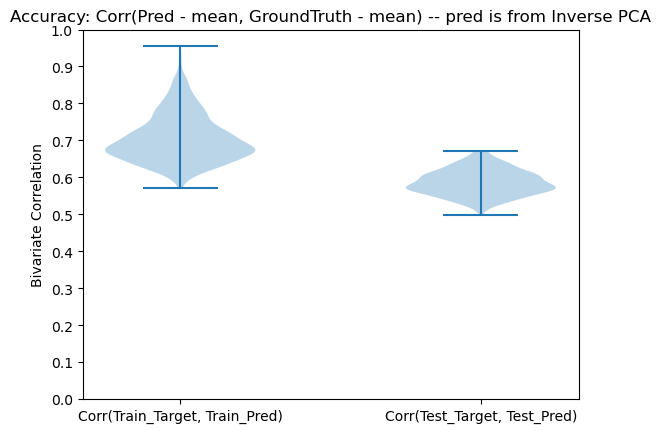

In [47]:
# 500 component PCA
trai_corrs = [
    0.7752062065790931,
    0.7538367016422495,
    0.7921442381647658,
    0.8389186215058804,
    0.7868447549118881,
    0.9177461318077513,
    0.7036891015441497,
    0.73536227397389,
    0.8124067993811585,
    0.868118937530337,
    0.7378636419681451,
    0.7977387751166921,
    0.6907853012993096,
    0.7758858915188427,
    0.7883176430264025,
    0.7534409233541038,
    0.8246625778833377,
    0.8261598319586911,
    0.913544417396996,
    0.8018929838114096,
    0.6997930082468982,
    0.8152315984271139,
    0.9110222394883635,
    0.6812155915093733,
    0.8412506648959581,
    0.9061606846531798,
    0.8574650090016533,
    0.7935736870284736,
    0.6600023871971815,
    0.8115211946354056,
    0.652479139492223,
    0.7006719506897298,
    0.8522438578818109,
    0.9078844287308393,
    0.8927407084172863,
    0.7680859316035891,
    0.9399583399152068,
    0.8371268537563756,
    0.7620511409305601,
    0.7899720152981287,
    0.7656754999011787,
    0.942850726799218,
    0.7587824752272893,
    0.8475334546446754,
    0.7805909966206063,
    0.975372442366787,
    0.8354495904128743,
    0.7689973733045797,
    0.8118309412379165,
    0.7222435618530755,
    0.751078183943711,
    0.83008922106374,
    0.8173266278991385,
    0.7888216772699576,
    0.8936124954322197,
    0.7590292915639328,
    0.7842285389149558,
    0.6947907680744351,
    0.7702589739692031,
    0.7704852005941548,
    0.7039252095868539,
    0.871642721377091,
    0.8639183176955997,
    0.8093490495382087,
    0.9417872130100975,
    0.8464041753769945,
    0.7577809333893896,
    0.7163515603218348,
    0.6919192904929888,
    0.7747825471012036,
    0.890905156505851,
    0.8815375404125275,
    0.8265754855360363,
    0.7727373520289578,
    0.8815489435753388,
    0.6736063586449079,
    0.8172792272143912,
    0.7762738132845445,
    0.6689150597462533,
    0.8970568443328756,
    0.7671885366403403,
    0.7949499059594117,
    0.748016612128299,
    0.7597387994424576,
    0.8750379470324625,
    0.7218532546289808,
    0.762216658622826,
    0.790738342983345,
    0.8736976764060421,
    0.9022086202512413,
    0.8544217686524502,
    0.6991008015080578,
    0.8663141398652693,
    0.8216375367503193,
    0.8304983313425317,
    0.7803650297325433,
    0.6742475094457644,
    0.8350659600032758,
    0.8704074411105588,
    0.7065715913702233,
    0.8627260364715935,
    0.7544121538305977,
    0.8628817806332334,
    0.7493907026851793,
    0.9138041262599896,
    0.8853843591177564,
    0.919829861748338,
    0.9104463020782358,
    0.8238068879823538,
    0.8617425219433418,
    0.7466700866701562,
    0.7350833773366307,
    0.8381973463745195,
    0.8083658642306101,
    0.7063496238882636,
    0.7349161229587714,
    0.805604916007193,
    0.8186262890006569,
    0.7784311071992192,
    0.8796121350433443,
    0.8883206094986031,
    0.8929099845870051,
    0.7584504090159533,
    0.6819197333133343,
    0.7088329224774607,
    0.6816595496263538,
    0.7891005873649877,
    0.8618871397576969,
    0.802026368172414,
    0.8121598253406701,
    0.7927979597783649,
    0.8919280049536789,
    0.7982190809672244,
    0.7872930853445751,
    0.8734503272154094,
    0.9415404145833143,
    0.7269877511106855,
    0.8503602180516898,
    0.8292444986288363,
    0.8224062321894551,
    0.7077098670485765,
    0.9501086119024961,
    0.7469510067953953,
    0.737076168382051,
    0.7774930703622945,
    0.7260380545735022,
    0.795528716967619,
    0.7775613742697328,
    0.7902356663691349,
    0.7563991792113184,
    0.9147026084200289,
    0.8591574111749699,
    0.6673409356772395,
    0.689476670883992,
    0.8046123011337188,
    0.7825229019018423,
    0.7209192616665823,
    0.9021301403064372,
    0.6993070423383332,
    0.8411616509737709,
    0.6889424149901957,
    0.7650158823352196,
    0.6827531577293273,
    0.8010226511367309,
    0.8046592994249508,
    0.8076877055405791,
    0.7121480626524896,
    0.948557174773642,
    0.7643090316529444,
    0.9266597940129433,
    0.821951347019947,
    0.8312431675588792,
    0.7447235931096285,
    0.8443501290425743,
    0.6870921827564255,
    0.7224689829837388,
    0.9635486494443526,
    0.6943374031510616,
    0.9629987815011376,
    0.7136165576600638,
    0.8909142691178257,
    0.6766256996822109,
    0.747517831632816,
    0.863802000859106,
    0.8902992609116946,
    0.7947990835533776,
    0.7821966137745723,
    0.7383916180125263,
    0.7151234015916793,
    0.8423527229834542,
    0.8313280367864405,
    0.8217391405071202,
    0.7912225747623994,
    0.7423915385334551,
    0.9203433213315735,
    0.8171946063719405,
    0.7428735181460568,
    0.7830794929794817,
    0.857327117797018,
    0.8637141727106137,
    0.7453356514920294,
    0.7164902855997968,
    0.8665702705916097,
    0.7074815440733525,
    0.762764964575988,
    0.8087325909166192,
    0.7798141027237983,
    0.7182668271457036,
    0.7163206632103196,
    0.7177127363129385,
    0.8160478093642871,
    0.718538506641749,
    0.8973487946679857,
    0.820548152204141,
    0.7205241043807842,
    0.7394162655860468,
    0.6991755586131634,
    0.7631498676062308,
    0.8283925631323499,
    0.7485134988715882,
    0.7008022129156174,
    0.7588160003045662,
    0.6776911357716614,
    0.9662697446527131,
    0.8831101049629538,
    0.9191949345042937,
    0.8474749114227762,
    0.840558329037191,
    0.876703101071204,
    0.7904310204018317,
    0.8821402374092808,
    0.7750793359745207,
    0.7413263371366364,
    0.9539149319428687,
    0.7602759128070705,
    0.8125499575323789,
    0.7569701566049971,
    0.8328604825531868,
    0.8051401272766718,
    0.7451284574835841,
    0.6900834425750173,
    0.8067782134546845,
    0.8966928636375314,
    0.6784861741705843,
    0.9454350871370338,
    0.9369656808668791,
    0.7914963616616872,
    0.8504381769353516,
    0.7222736515177514,
    0.8796708202440452,
    0.8593164503706151,
    0.6908903566900501,
    0.8126006428923005,
    0.6964869214545827,
    0.9179389040553723,
    0.8963530612019404,
    0.7042681982459208,
    0.7336565644653439,
    0.6467137186348884,
    0.9075396001359805,
    0.9557909055118581,
    0.7711412897299051,
    0.8437502943401375,
    0.776594215000124,
    0.8525666238891055,
    0.704188934213481,
    0.9523183731718871,
    0.733223909068328,
    0.7394135269634063,
    0.8336763938718308,
    0.7807358221291728,
    0.7719218410310095,
    0.872236523494153,
    0.9106860359313963,
    0.7779003686400097,
    0.8720980151233705,
    0.6939013571163715,
    0.6905532657082973,
    0.8787705702686288,
    0.6803043372236894,
    0.9174207780494325,
    0.6721256086082535,
    0.6852138353165202,
    0.7635196495120616,
    0.7719508024848228,
    0.8240054566830981,
    0.8106981566181527,
    0.8324376973727071,
    0.8887204234303768,
    0.7676146781360751,
    0.7653346741996936,
    0.9199945822074062,
    0.8076408514800654,
    0.710287598106619,
    0.7127012474589243,
    0.9361624463453061,
    0.7854190812518463,
    0.7981654978228464,
    0.8556634925738865,
    0.7352073861524705,
    0.7032414224839669,
    0.8050910711379693,
    0.7554750983084787,
    0.9014874550992129,
    0.9165168059151466,
    0.8279027162191422,
    0.6945854838021263,
    0.7168507470168248,
    0.8009903387503522,
    0.779206145541607,
    0.6904047756151689,
    0.6940653707997071,
    0.7066669117391489,
    0.6702830251547873,
    0.8884670189888929,
    0.9055254165605285,
    0.7124479479836007,
    0.8238552530756326,
    0.7194645660721988,
    0.7013572665568227,
    0.7889734324911201,
    0.8242067446442259,
    0.7402926551868436,
    0.828096908051155,
    0.8173150202902053,
    0.6624181028748833,
    0.8812100218185651,
    0.9036292443321159,
    0.8909280498839331,
    0.7438572397055562,
    0.751912299620582,
    0.8615688410925161,
    0.916723489891258,
    0.7058341044347857,
    0.7353283519470285,
    0.8565605516109855,
    0.8437303671532921,
    0.8060608438041362,
    0.7142443079010067,
    0.9086356235710944,
    0.7644551969502374,
    0.8996499975995323,
    0.8689315368537992,
    0.8002741140069771,
    0.882075548360724,
    0.7832684161249472,
    0.7907439689567386,
    0.8961562376605802,
    0.7992249556902137,
    0.7393641617395449,
    0.808998464180532,
    0.7610843603283596,
    0.837342925333803,
    0.6960649059442929,
    0.8362293071025122,
    0.7648947163829196,
    0.9052172810798209,
    0.7178669727708785,
    0.8988533787507986,
    0.8421845605365004,
    0.8664505524628127,
    0.8383835377696128,
    0.7037986630194766,
    0.6739218649359434,
    0.8213657904880621,
    0.8967750132277156,
    0.8369883348392316,
    0.7477181863595969,
    0.6761618552400676,
    0.7782010134840238,
    0.7611962985857706,
    0.7484609083852903,
    0.6708264893826945,
    0.8117624016111755,
    0.7865366942833449,
    0.7838515939486581,
    0.7759094598102493,
    0.7981269541002666,
    0.6968542887923089,
    0.7992532199960313,
    0.7926559257240188,
    0.8576058440229285,
    0.7672127089278358,
    0.9317415106853143,
    0.7634127503399837,
    0.6799027227998077,
    0.8069270412921894,
    0.8479354464887638,
    0.8271034382129493,
    0.9447419205888095,
    0.815285457277562,
    0.9504122117475774,
    0.7174889360501547,
    0.817329344109208,
    0.8549283567452125,
    0.7681901632644684,
    0.8078647486621183,
    0.8724462200907652,
    0.8612276445272031,
    0.8379099344391869,
    0.8078834412550316,
    0.7365533278198455,
    0.7790969493661717,
    0.7834862768046993,
    0.745281099040632,
    0.7447383418699858,
    0.6947492851440806,
    0.9449541058238405,
    0.8364331403508651,
    0.7990810050310004,
    0.7279763973873707,
    0.7819994371357284,
    0.7810557807580008,
    0.8601501626889674,
    0.8066329641076045,
    0.8752603634730446,
    0.835491336103105,
    0.8485817516527655,
    0.6617207654542347,
    0.7853428348850889,
    0.7190659571110677,
    0.6928353344075722,
    0.812246739114074,
    0.7286707663541842,
    0.7037996066260103,
    0.7571511453561546,
    0.7404468654785687,
    0.8491048754107303,
    0.7710909039773676,
    0.8979383335053954,
    0.6918834040702299,
    0.8613610534905078,
    0.7716045953848171,
    0.7350661064981867,
    0.7034397735893495,
    0.7956772000837969,
    0.8016864165202893,
    0.712998114750686,
    0.6370565804603452,
    0.9798817933224456,
    0.8984122209463975,
    0.8150495537734236,
    0.7736572585520199,
    0.7177117676296408,
    0.9117293536615964,
    0.7839240045811502,
    0.8208398231434745,
    0.864579199646907,
    0.6652668860548565,
    0.8792053059104902,
    0.7926388231629855,
    0.7235101405040827,
    0.8130024927880998,
    0.7384663008307879,
    0.8190292663126636,
    0.7758840784030726,
    0.8399497018642758,
    0.7079484834273488,
    0.8081570494127159,
    0.6599324690788593,
    0.7054487858754662,
    0.7443093799489888,
    0.8280961941262072,
    0.8162395372220194,
    0.9135660729157034,
    0.7303946527530913,
    0.8054043042740562,
    0.7031924008801068,
    0.718609985319652,
    0.7041679980401944,
    0.7450106836886263,
    0.7729280103005812,
    0.9872204076757749,
    0.7022899375854598,
    0.8968463946736682,
    0.9211742537712045,
    0.741147507606451,
    0.766986687519997,
    0.7750614186950833,
    0.7678445276356398,
    0.7351322493891468,
    0.8151142891365444,
    0.7587814079966252,
    0.7655437247427282,
    0.7807653878349889,
    0.8527267553958742,
    0.849325849843494,
    0.7355006515423951,
    0.8262423037556839,
    0.7977868724757037,
    0.8200283699636146,
    0.8103131087792741,
    0.7122581833050496,
    0.7107243205634525,
    0.7139926772327485,
    0.814904130033777,
    0.7677579383473814,
    0.719522606817002,
    0.7652574733747877,
    0.8428540034892128,
    0.687969526571293,
    0.7058620346561021,
    0.7844470691793988,
    0.854731311567654,
    0.7040677662436547,
    0.7245285433781301,
    0.7185394815137569,
    0.8571734835388466,
    0.7756364173462115,
    0.6528369850404564,
    0.6816632226395416,
    0.8079194143226573,
    0.8581323130730891,
    0.710136037615282,
    0.7246249971132783,
    0.8470617331970536,
    0.7065382027681565,
    0.6970227303847134,
    0.7389174527704578,
    0.9325714633281422,
    0.8534831980440774,
    0.8042120425091085,
    0.6661076712918079,
    0.8080438586769166,
    0.8202629206637456,
    0.9268088431046904,
    0.851401573096154,
    0.7450086011359768,
    0.9440918024578346,
    0.9175209936956271,
    0.7556469706553205,
    0.6812107752948993,
    0.7119253290221628,
    0.7571595863185001,
    0.725274564713925,
    0.8074551335127442,
    0.7161257500114273,
    0.7415820296210849,
    0.7597577317273562,
    0.8076530267162225,
    0.7615817816748964,
    0.7552723799081504,
    0.8575848721578435,
    0.9422994052421214,
    0.8227759692813661,
    0.6754100399061395,
    0.7631363060806439,
    0.7110582504562595,
    0.7145247682765441,
    0.8532807971642385,
    0.7873686880143533,
    0.9025410178602342,
    0.7558115112017862,
    0.8621226761827896,
    0.83552048505508,
    0.8724283849430939,
    0.724656293418322,
    0.7145340494577219,
    0.7616698720122616,
    0.8084748493006119,
    0.742389461738787,
    0.8402977581673375,
    0.8526641215526931,
    0.8171394431894403,
    0.8965528370799873,
    0.7256211575459965,
    0.7284327078691419,
    0.702495339491801,
    0.726904451626176,
    0.8375195415143297,
    0.8038523648205124,
    0.718284378612612,
    0.6619250129262675,
    0.8342741470204885,
    0.7369073210646908,
    0.7180267124922498,
    0.9262738070120785,
    0.7040582120971534,
    0.8042644890181107,
    0.7556482570858318,
    0.7444864566329953,
    0.7735877976830157,
    0.8145059024845488,
    0.8658130576398687,
    0.7063168123054944,
    0.8727409686150057,
    0.7221770876345915,
    0.8118618560468825,
    0.7635718421415095,
    0.8085510239240818,
    0.7885972935872944,
    0.815529279501533,
    0.8881459291406056,
    0.7466353852563448,
    0.7089767947010047,
    0.7627308059427333,
    0.7555423193391041,
    0.8651172646881043,
    0.7762539754706897,
    0.7183286668048697,
    0.8720391253582258,
    0.7549114781990637,
    0.8155524289336128,
    0.9532838420648218,
    0.7245596278877171,
    0.7900867962911592,
    0.8350800109541551,
    0.9272886733598736,
    0.7803368711550938,
    0.8468995463283299,
    0.9056773765087294,
    0.8375262701738868,
    0.8722602856068893,
    0.7937794646817752,
    0.9156503814409999,
    0.669158089676353,
    0.7157046579833108,
    0.7794219599709162,
    0.9420064870907334,
    0.7567392659492287,
    0.7028958713637427,
    0.936662956072709,
    0.8350538428470223,
    0.7884126675877875,
    0.7997926316042866,
    0.7639900104542182,
    0.8863729152672709,
    0.847808659578907,
    0.8758392124819098,
    0.6607378178332017,
    0.7848035739303917,
    0.8506003147641169,
    0.7885364240519933,
    0.8093839482648514,
    0.8809001261580606,
    0.7330333087106334,
    0.9074395818456156,
    0.737692698734475,
    0.8978922667489562,
    0.8013515821128536,
    0.7756539283065865,
    0.8098359705795494,
    0.8480377119231117,
    0.7940388915270306,
    0.7273971916210447,
    0.7674693134539461,
    0.7369655361073345,
    0.6896962916548399,
    0.7508888547995536,
    0.9201102043774056,
    0.748804325535685,
    0.8672606422805074,
    0.9133608222382792,
    0.7469474223429224,
    0.8004362376846021,
    0.6992975775101794,
    0.8160689453114341,
    0.943831935690473,
    0.8350606232110259,
    0.7168248222886988,
    0.8648362971994048,
    0.7732758932737301,
    0.8574232108718223,
    0.6617764285342239,
    0.7770298059272522,
    0.9101471435734574,
    0.8140268338798972,
    0.8035949085098103,
    0.8379053198643901,
    0.7374944972728738,
    0.7630754083934912,
    0.9531855703928821,
    0.871495313685226,
    0.781202869004046,
    0.838915082086226,
    0.9294499938363849,
    0.6891141941847061,
    0.9271924051625988,
    0.9218493173665095,
    0.8169353721781876,
    0.8077097767555488,
    0.7192786056321657,
    0.9115223707674922,
    0.8866241441368554,
    0.9707360302693752,
    0.9054648163696989,
    0.8973276958159244,
    0.7987539686385261,
    0.7629802137629955,
    0.712812394336889,
    0.7759082631444751,
    0.8031783339709784,
    0.8377752606410188,
    0.8734251412347603,
    0.7136803875154897,
    0.7417280327066855,
    0.9371696432556155,
    0.9229621859627672,
    0.8949437559858694,
    0.8614669058697734,
    0.9014395100727575,
    0.759244844441979,
    0.9298993720672797,
    0.8336084274144068,
    0.727178736647676,
    0.8058858397528872,
    0.7933927087295171,
    0.7895176400028187,
    0.7343848691539777,
    0.8664119038471986,
    0.7291631716351886,
    0.734510912883263,
    0.7655789997517757,
    0.7283230551451737,
    0.7539128413889253,
    0.7807114092909136,
    0.9061153587679301,
    0.7744190507258683,
    0.8473451393350323,
    0.8877433566357249,
    0.745421702925581,
    0.8358237223894435,
    0.7677779918917977,
    0.7961894606299126,
    0.7259178986447895,
    0.8566432456568942,
    0.8111940415225981,
    0.7170787168155907,
    0.7725560842360959,
    0.7956088411212151,
    0.7785064186313265,
    0.6837111256559767,
    0.9163445948455797,
    0.8295020506469809,
    0.8841770363884868,
    0.730870190383667,
    0.7702276756191208,
    0.8837240820928364,
    0.8189803431243546,
    0.7983300316676345,
    0.852594781310097,
    0.8519362926272571,
    0.8982691532364043,
    0.6998208445638776,
    0.9514076572497147,
    0.7992074734100567,
    0.9572498374091989,
    0.9233041671242932,
    0.8104685979191159,
    0.6895685065538695,
    0.755085150756823,
    0.8925856045184825,
    0.8411400044601217,
    0.9294874983033345,
    0.8147201978420261,
    0.880780337038638,
    0.7610261464135584,
    0.7752552952829275,
    0.9096020981615982,
    0.7239767609949219,
    0.8509271894406594,
    0.7483892791433996,
    0.7919774724355505,
    0.7815481177360646,
    0.7619138840704001,
    0.7654587637759022,
    0.7654351036406091,
    0.9133471628740918,
    0.720636987122579,
    0.7322760190954681,
    0.778978022639504,
    0.8205232295719245,
    0.7321005153315647,
    0.7525504338645435,
    0.6875607431696331,
    0.7611066686918663,
    0.7278018705127072,
    0.7459296534391385,
    0.7736603210505039,
    0.8235763425338488,
    0.8905052731914699,
    0.8077432714601629,
    0.7315685042457917,
    0.768890653766606,
    0.8827302525523425,
    0.7133909295951263,
    0.8591537587185336,
    0.8585067239577808,
    0.7909098530661774,
    0.7798425753455764,
    0.6909832451037007,
    0.7943050702944072,
    0.6715600349164588,
    0.7136272551155558,
    0.8537473965726432,
    0.9302954080067188,
    0.8681177640685459,
    0.7830833469125177,
    0.8825013302009251,
    0.7779050757097719,
    0.7554383302688786,
    0.8232991856785931,
    0.7600308521813925,
    0.9460941955883966,
    0.6950918046376738,
    0.8649851750699639,
    0.7513543822691784,
    0.972557692584067,
    0.7634598920727392,
    0.7438259495687419,
    0.7021116028750352,
    0.7416563943406262,
    0.6976203466689059,
    0.8539821011841366,
    0.7667404445712078,
    0.7942994618988612,
    0.8726572583754266,
    0.7532710002222646,
    0.7453217269109302,
    0.721616051468006,
    0.7924450820036804,
    0.7726221142428265,
    0.6958593393137347,
    0.8527897554165453,
    0.8904299685789702,
    0.8467476941275913,
    0.916482208941111,
    0.8080515800666324,
    0.7135830362092181,
    0.7165442199384817,
    0.7017714469097053,
    0.7677650292442271,
    0.8097072465068264,
    0.8012825961020441,
    0.8085572560178201,
    0.7722055348870636,
    0.8899687508092811,
    0.7064588218709574,
    0.792511084414226,
    0.7715047363812317,
    0.6869744789333236,
    0.8874129749228404,
    0.7745833169555877,
    0.7799272369875491,
    0.7475956665836226,
    0.7662534262031557,
    0.8207268036435776,
    0.7298644081979317,
    0.7391157736759554,
    0.8041325886874063,
    0.8917909154128667,
    0.8792748026069634,
    0.7934539109708577,
    0.6992118572530027,
    0.8432096549935694,
    0.8117304974991754,
    0.7966532568529892,
    0.8015098950796944,
    0.6671381871378238,
    0.8165891489773243,
    0.8678823544720405,
    0.6821020647062466,
    0.8475948537999808,
    0.7710661980667061,
    0.827747455417588,
    0.7470101889431094,
    0.9019611130249034,
    0.8656716311684105,
    0.8617460805437196,
    0.8685308003421299,
    0.8127879658118526,
    0.8525079350477748,
    0.7514450402190589,
    0.7269135736099156,
    0.8228752829481,
    0.8414292940606682,
    0.715068312453353,
    0.7474857901693261,
    0.790290323757373,
    0.7949578280207241,
    0.7585796839541865,
    0.8594254396458398,
    0.9091467470710592,
    0.8763726672562007,
    0.7254727534585851,
    0.7000931015263203,
    0.7258689045528768,
    0.6859366592377156,
    0.7583245280168904,
    0.8595706900186576,
    0.7987601257866956,
    0.786455316838392,
    0.814657964132853,
    0.8637343728109045,
    0.7639392300125659,
    0.782733732808031,
    0.8672557823172311,
    0.9352098411391395,
    0.7310314472730473,
    0.8860740699683225,
    0.8223094257965509,
    0.7886154123116267,
    0.7269731945579126,
    0.8988816191685942,
    0.733448246639491,
    0.7279113485180845,
    0.7394207233241041,
    0.7059462432258926,
    0.7472455854726259,
    0.7312411744939047,
    0.7322341162739234,
    0.7925543507045745,
    0.8868854361621484,
    0.8195881786488003,
    0.6781429405410693,
    0.6981198533059648,
    0.7465292065523204,
    0.7536844745625051,
    0.6897773675500494,
    0.9007931204143252,
    0.7121617616783443,
    0.8534401527978218,
    0.688456857484167,
    0.7692885463185467,
    0.6904179112895928,
    0.8027077195582197,
    0.7728281592759035,
    0.843838564741241,
    0.6998979545813359,
    0.928578157041616,
    0.8491597031709597,
    0.9420841196418077,
    0.8197568289056342,
    0.8077394934239972,
    0.7226229418257408,
    0.8231301253697165,
    0.713625028866115,
    0.6986440985836971,
    0.9547926649799228,
    0.7071589975018242,
    0.9518287726469973,
    0.7216779372764818,
    0.8617365064315744,
    0.6778291507066383,
    0.7674029873367334,
    0.8516466787504997,
    0.8895877400575437,
    0.7406227507865956,
    0.8102498313170821,
    0.7305855673493705,
    0.7514408355190644,
    0.8766160772087643,
    0.8211818151780995,
    0.8242688919888439,
    0.73094059668415,
    0.7396404901928076,
    0.9108305304434341,
    0.839046797408089,
    0.6896218169083197,
    0.7856499475834502,
    0.8394404574250091,
    0.8590614920666809,
    0.7577150035383581,
    0.6933201791620095,
    0.8473445747812172,
    0.731345174000333,
    0.7760086757187755,
    0.7430376223829918,
    0.8011258302766069,
    0.7253441196942366,
    0.7092356807673506,
    0.7414694229002956,
    0.8270105493832396,
    0.7467688690658427,
    0.8786359924201208,
    0.7706710834659242,
    0.7373662156151355,
    0.7347934756777128,
    0.7246315694776303,
    0.796114569727448,
    0.7867753645277732,
    0.7714935983098993,
    0.6630711957999379,
    0.711728061262843,
    0.707603712879283,
    0.9374072088276915,
    0.8670061830337535,
    0.9115602369487783,
    0.8323918568690665,
    0.9069343053306917,
    0.8325036785515939,
    0.7705823951937404,
    0.8743755531296212,
    0.7570308598791096,
    0.7470050521398961,
    0.9235174191547161,
    0.7901680879878519,
    0.8116184233975904,
    0.7462751314013092,
    0.773740690766265,
    0.7949761059167564,
    0.7825965963272004,
    0.6846143718162023,
    0.8045397221203116,
    0.8870355016737682,
    0.6746109099908614,
    0.9469567954907597,
    0.9111440190069514,
    0.7754750188400834,
    0.7871900446693149,
    0.7286109416250012,
    0.8922609962813562,
    0.8151135698463303,
    0.736777289091309,
    0.7730657033094547,
    0.7013506611859815,
    0.9086032015641955,
    0.9009848025390971,
    0.6874704195010034,
    0.7273807531224004,
    0.6732685345430947,
    0.9100662611974863,
    0.926270605413455,
    0.7956675140952645,
    0.8126321288772331,
    0.7900920000524969,
    0.8443344331568124,
    0.7119107553349542,
    0.9440614109394438,
    0.7606833645847285,
    0.7133878845695933,
    0.84493854880119,
    0.7816832155254589,
    0.7985658108926083,
    0.8646864193552869,
    0.8964766790671964,
    0.7649419455290117,
    0.8673726259450747,
    0.6775233672784725,
    0.6768077982878373,
    0.870298586906187,
    0.6834331782546071,
    0.8673614066010727,
    0.6874868406999657,
    0.6895570067221318,
    0.7262211486263297,
    0.7612527805893409,
    0.80485729336667,
    0.8170159469226475,
    0.8493343926602982,
    0.8474858520282593,
    0.7405503189564339,
    0.7701850977681782,
    0.8912325280352928,
    0.8494663992302173,
    0.7292775936098163,
    0.6974865564996969,
    0.9299920799807562,
    0.7692365888417931,
    0.7618950091133548,
    0.8178768271293213,
    0.6688740281904969,
    0.7221707125022134,
    0.7670455059561634,
    0.7363396277420124,
    0.823285745197693,
    0.9361301522709757,
    0.7902605829081302,
    0.7328601178055851,
    0.7268343258839026,
    0.7896350089115809,
    0.8187777262256486,
    0.68673053136524,
    0.7298425220882475,
    0.7030660814765043,
    0.649563155156138,
    0.8471459269993732,
    0.8819976732088031,
    0.7523711800260072,
    0.8115296906024336,
    0.7398307258798137,
    0.7080218188758093,
    0.7991292458184712,
    0.7937549247206609,
    0.7367626835841435,
    0.7967014631396631,
    0.8085166765417757,
    0.6830212610196947,
    0.8483086189978938,
    0.8982457684140894,
    0.8930602350206355,
    0.7264853286353349,
    0.7259157651070727,
    0.832281328351265,
    0.893220410136983,
    0.6935666041531201,
    0.7631529300738819,
    0.8266476266830413,
    0.7908933300433666,
    0.8677792694060024,
    0.7098431284570287,
    0.9012948229428652,
    0.7911729224186873,
    0.9085617334160276,
    0.8579387377679899,
    0.7827059297892951,
    0.8843806179527378,
    0.7912549999165059,
    0.812051351505738,
    0.8702192080575382,
    0.7641841114883147,
    0.7434896763432989,
    0.7890084173004822,
    0.7294827582188219,
    0.8501653335113444,
    0.7457247452465826,
    0.8329006713356358,
    0.7648843669690539,
    0.9254658836921649,
    0.7077479523293405,
    0.91442511967985,
    0.8184206483706011,
    0.8622661615528282,
    0.8284267946628687,
    0.7047852209062724,
    0.6955570136841295,
    0.7750611368044473,
    0.8695788816100227,
    0.7802116662731734,
    0.7701460663627545,
    0.7035839238017746,
    0.780609236578371,
    0.756214644672359,
    0.7256020362909505,
    0.7030999833601068,
    0.7846309455195919,
    0.8804282816107369,
    0.7945812125864247,
    0.7246031387390183,
    0.8688114231912504,
    0.6968043107638923,
    0.7765576259773732,
    0.785455160409577,
    0.837188452903085,
    0.7907409604069339,
    0.922053763101633,
    0.7489998086986117,
    0.6765508031725572,
    0.8141107061523634,
    0.8347376184487738,
    0.8623748218239243,
    0.9306112045510544,
    0.8320441955056834,
    0.9559947781840342,
    0.7228530997489238,
    0.8036697704982668,
    0.8574599574982096,
    0.7422661416760747,
    0.7794017967126433,
    0.907596991117489,
    0.8497986845095041,
    0.7964801350910368,
    0.8068576105897866,
    0.7450264840096323,
    0.7587918719839312,
    0.7727471580608481,
    0.7137434089066086,
    0.7688585464221294,
    0.7220311891260506,
    0.9336005668674213,
    0.8009577862919237,
    0.8258494676809834,
    0.7404767038639364,
    0.787699429542189,
    0.8587048584996464,
    0.8482897805727614,
    0.803416635030823,
    0.8370202422714335,
    0.8169481097737689,
    0.8383157540373377,
    0.6527067919738945,
    0.7532567875152073,
    0.7348301036552676,
    0.6850646661110092,
    0.8240602751435763,
    0.7367828994794128,
    0.7125455555889443,
    0.7608239100787222,
    0.7238845492175024,
    0.8267495413860974,
    0.7551259884753981,
    0.8726760652735664,
    0.6828495421308112,
    0.8184254935144073,
    0.7546250489216872,
    0.7114136565582055,
    0.7404665093825675,
    0.7988513640259923,
    0.802162489620977,
    0.711585730328134,
    0.6859374515492838,
    0.9824762708760729,
    0.9015462498665808,
    0.7629208205966611,
    0.8038945517232762,
    0.659060826398724,
    0.9020265971484114,
    0.7835617068962274,
    0.8995409747264219,
    0.8795773979122379,
    0.6626573416741678,
    0.8793699556088963,
    0.7893886234648827,
    0.6835062874512465,
    0.7772674217410696,
    0.744704042295842,
    0.8541313411626601,
    0.7461568517858533,
    0.8371509889828813,
    0.7100143380269935,
    0.8010561831965611,
    0.6763050892445016,
    0.7279324941310548,
    0.7384358601450902,
    0.8109075557581873,
    0.8147571253762437,
    0.8930602240182026,
    0.713759291652293,
    0.8123855900156146,
    0.6803783491219126,
    0.7342508539293848,
    0.7435674682169368,
    0.7226442180316166,
    0.7256492400296445,
    0.9853795015379072,
    0.734700816389164,
    0.903665361954632,
    0.8448471060814546,
    0.711633437660376,
    0.7933955300997062,
    0.7585114535864557,
    0.7589766743039289,
    0.7347719120841085,
    0.8270809323267994,
    0.7742393544352915,
    0.7578972819600404,
    0.801716904768801,
    0.8491061897069939,
    0.8147967228236,
    0.746812728758595,
    0.8201842428305653,
    0.814712409053245,
    0.7263645402019024,
    0.7918027368736654,
    0.7376230195791574,
    0.7375893634695231,
    0.7151927230685414,
    0.768196573898864,
    0.709834714358954,
    0.760016703981149,
    0.7527380324593481,
    0.7776798650148082,
    0.723584249891374,
    0.7100342586313487,
    0.8065595564280759,
    0.8093836279129584,
    0.7011444633487206,
    0.7323851400231086,
    0.7571521160256015,
    0.8681914892011228,
    0.7512491330066614,
    0.6910249436587947,
    0.6985617950495453,
    0.746120056761166,
    0.8608886465640021,
    0.7302988797456599,
    0.7470714273005585,
    0.8264450115450626,
    0.7376886120194134,
    0.7013584591551197,
    0.7703448218054848,
    0.9011572972236055,
    0.8189823390958663,
    0.6970334328295618,
    0.6551686933551426,
    0.799828381897108,
    0.8234427518140848,
    0.9182085028012568,
    0.8350896106990618,
    0.7028680727014252,
    0.9370976365314594,
    0.933230887931143,
    0.7466664176487168,
    0.6738172439503809,
    0.7205901024676143,
    0.7114669151547212,
    0.7474857513598417,
    0.7569282251411059,
    0.7098827378868621,
    0.7158068620680782,
    0.753757199736068,
    0.7696197288812153,
    0.786697965723664,
    0.7290228150954567,
    0.8730528645528719,
    0.9215677702305984,
    0.8248777927630377,
    0.7230691786292353,
    0.7662959735787099,
    0.6832465877365829,
    0.7043881815882312,
    0.8676680020793774,
    0.7776275433861392,
    0.8634511349903976,
    0.788233553108105,
    0.8196866484426366,
    0.8532318570984919,
    0.8619813273104285,
    0.7347211271855426,
    0.717397615421667,
    0.7146646396163806,
    0.8199140774461082,
    0.7358491035270903,
    0.7907723109938259,
    0.8249621134519066,
    0.7953555559063228,
    0.8636820319760016,
    0.6971592124400632,
    0.6942444690679191,
    0.7119755739000864,
    0.7466318897933355,
    0.7887621092391827,
    0.7819221844644625,
    0.7273185149320806,
    0.6834924790940086,
    0.7737733883774461,
    0.7059914976949243,
    0.7177421951728167,
    0.8991300948519301,
    0.6959635178540693,
    0.7732756042467627,
    0.725756915260978,
    0.7546273244594064,
    0.7567446302120566,
    0.7795383782372242,
    0.8746840120797583,
    0.74549106936363,
    0.841149370089309,
    0.7415339258297748,
    0.7659684868802948,
    0.7769953273673982,
    0.781780916960695,
    0.7559895174202159,
    0.8001497076794474,
    0.8215324476513245,
    0.7457796417257146,
    0.6832814851451069,
    0.7151751566225789,
    0.7409405889581381,
    0.8860072032204555,
    0.7850456208212498,
    0.7294138146494078,
    0.8227393086992376,
    0.7294609752313483,
    0.8769411233809479,
    0.9433991538605594,
    0.7298834651095517,
    0.7684437023856511,
    0.8241250605642911,
    0.893053992651208,
    0.7936990770784335,
    0.8289509979353425,
    0.8801215936916862,
    0.8493117703856805,
    0.8664667344563433,
    0.8309527246578249,
    0.8712926423390682,
    0.6889236177635397,
    0.7082779499945262,
    0.7573255489028922,
    0.95526407235648,
    0.7126643784765928,
    0.6980272078252077,
    0.9310182692819964,
    0.8073920048718722,
    0.7066263013779169,
    0.8316569427821424,
    0.7741037249118314,
    0.8764796643715438,
    0.8546872698879231,
    0.8811034443772047,
    0.6681432821351934,
    0.7837940846417714,
    0.8155143173612732,
    0.7507625737234633,
    0.8012988022135172,
    0.8773064849574052,
    0.7159374227434195,
    0.8869884274010664,
    0.7617890622544919,
    0.884730225264546,
    0.8170097095147394,
    0.7818375431478221,
    0.8205157467811026,
    0.7890303966417408,
    0.7579425078787543,
    0.7305326378867776,
    0.759827374370976,
    0.7729099003444199,
    0.6878503282711609,
    0.7732214721056855,
    0.8695120371677225,
    0.7788044038943082,
    0.8296209498017935,
    0.8727189849771473,
    0.7687259466794987,
    0.756018115169124,
    0.6946646750921791,
    0.8034269104431423,
    0.9397758647668358,
    0.824990813167197,
    0.7124573565730186,
    0.854043896575479,
    0.7619578356706732,
    0.8423962655620643,
    0.6857204481175088,
    0.7798948607182642,
    0.8658410923182093,
    0.7900282056703538,
    0.8253895181873593,
    0.804459572682032,
    0.7427394117534788,
    0.7940600073570953,
    0.9545699464632689,
    0.8398743688500873,
    0.7577708719414697,
    0.7799762961472488,
    0.9239861271414432,
    0.7163043401030962,
    0.8923384102547864,
    0.8868569399254205,
    0.7759849333540034,
    0.7588854954094947,
    0.7640171243774875,
    0.9165775436842277,
    0.873029707616092,
    0.9720833015549114,
    0.8713021474246974,
    0.8611070035016372,
    0.7782681573086673,
    0.7500796048795412,
    0.678014789388215,
    0.7817637295821439,
    0.7575648964895053,
    0.7993536692676465,
    0.8860652367994227,
    0.6813067225205007,
    0.7182890950844173,
    0.9179216138653999,
    0.8908290536440422,
    0.8700426081139956,
    0.8128593938803033,
    0.9302299115203503,
    0.7158958849601863,
    0.9523350979402719,
    0.8107861330105367,
    0.7187993335732921,
    0.8102056711570982,
    0.7932275832205437,
    0.7501389167098839,
    0.7388218028031738,
    0.8661218652164843,
    0.7506854427860781,
    0.7520177793354165,
    0.7325058930566789,
    0.7555933655997445,
    0.7418669795648133,
    0.7661328967792144,
    0.9020446830335899,
    0.7520192780919879,
    0.8248329499952067,
    0.8808394793728848,
    0.7148006218013839,
    0.8210958596867692,
    0.8011106668200157,
    0.7277106087404707,
    0.7043762243885013,
    0.8232173907843318,
    0.791383357629653,
    0.7041188229878802,
    0.7768576938927806,
    0.8293328682546792,
    0.8327928444253734,
    0.707108936050001,
    0.9081826058603891,
    0.8458071251206458,
    0.8544260843162003,
    0.7442913919745878,
    0.7449288604844774,
    0.8604450050769044,
    0.8058621659575703,
    0.7704614232289921,
    0.8582688936021928,
    0.8114926719163932,
    0.8873372909707239,
    0.7186189151728696,
    0.9236451955304188,
    0.8046553836471244,
    0.9606918731365082,
    0.9100330067249334,
    0.8250296719165793,
    0.7005982104670141,
    0.7923369943651095,
    0.8694347222903748,
    0.9233351193651066,
    0.8986794912786863,
    0.7916120020949216,
    0.8861486592127026,
    0.7485717011518112,
    0.7958465058840222,
    0.9183187528539231,
    0.721959182094584,
    0.8150036647840914,
    0.6960489027232173,
]
test_corrs = [
    0.5741200962351659,
    0.5669179235800275,
    0.5428556958135763,
    0.53355199974813,
    0.6471752400019117,
    0.582986176220289,
    0.568282836908683,
    0.5487894731447104,
    0.5922783290446823,
    0.5763565924966707,
    0.6590155484388079,
    0.5907654697186516,
    0.5545819544265567,
    0.5437448651126074,
    0.5487381226845035,
    0.6352503372887625,
    0.5536095820474506,
    0.6082385836551335,
    0.542636672407159,
    0.541552878868749,
    0.5976095576070195,
    0.5470683916516886,
    0.5378635149897264,
    0.5758862103261062,
    0.6083050346650821,
    0.5583937409991487,
    0.5671105605554637,
    0.6211937008774642,
    0.5581199109058342,
    0.5586264362355483,
    0.5784424368465129,
    0.5965891353947181,
    0.6672305572375584,
    0.5688832555038673,
    0.6169807872513143,
    0.5867864573428726,
    0.6003229231095515,
    0.5442012845222051,
    0.5637785478880378,
    0.6071541541707491,
    0.5815447026901984,
    0.5231584872882982,
    0.6230897215578822,
    0.5511715865716801,
    0.5795661875555461,
    0.5244335699530293,
    0.6228581899979059,
    0.5170185278999685,
    0.5946425022445866,
    0.6021572001091988,
    0.6180334935582634,
    0.5999815006446949,
    0.6098491079903693,
    0.5344746451003395,
    0.579272743478196,
    0.6473303625682051,
    0.643282164087523,
    0.5705107296087857,
    0.5928647057389549,
    0.6067887837761715,
    0.5619088528714512,
    0.57385440525399,
    0.5673166604106578,
    0.5847421976234997,
    0.5282348104591157,
    0.5901284299502705,
    0.6048677422156736,
    0.5443506537416226,
    0.5611365914635477,
    0.5902692007944971,
    0.5719960703840384,
    0.6486575807642264,
    0.6597742837715208,
    0.5669432737125831,
    0.6375719244945649,
    0.549231356244747,
    0.6356513553892715,
    0.5525020009259838,
    0.6100340485961203,
    0.5723563949247279,
    0.6427882122605209,
    0.6108121003967695,
    0.6194091590972366,
    0.5642813883682781,
    0.5735678345941297,
    0.6182849161166077,
    0.575294768812172,
    0.5609811775159977,
    0.5917211028217134,
    0.5351751410988256,
    0.5631795207146678,
    0.571627615409555,
    0.5500280969107598,
    0.5781525652619476,
    0.6211360076013758,
    0.6294544029790712,
    0.5681826828775438,
    0.6066417087173146,
    0.5910369171295348,
    0.5715731339117326,
    0.584659589826941,
    0.5618341692643598,
    0.5779222749944103,
    0.6322167023660443,
    0.5515710743699862,
    0.6221640040623598,
    0.6267975323396476,
    0.603948467087848,
    0.56857000420705,
    0.5735446288304106,
    0.5827028336451154,
    0.5668863229537717,
    0.5905165154115416,
    0.5649188741112394,
    0.6123085646681443,
    0.5989257693986368,
    0.5378393248176944,
    0.6188841747215019,
    0.5615572112939472,
    0.5226856482381874,
    0.595645825701113,
    0.5381672953516229,
    0.6216924789057728,
    0.5699491451067568,
    0.566922826450044,
    0.6214501019189935,
    0.6328062233759488,
    0.5944782665316942,
    0.5424346632872569,
    0.5083207687440793,
    0.6143463877185281,
    0.600553507503675,
    0.6112352885943443,
    0.5617992678708711,
    0.6032846447300598,
    0.5993205331540866,
    0.5974293106100339,
    0.5474863864344663,
    0.6148859091836377,
    0.6360964725253028,
    0.6116354878744887,
    0.6369990404404703,
    0.5864875141542744,
    0.6369723704959275,
    0.5730296484530153,
    0.6050591910671094,
    0.5772682897048095,
    0.5689434657764357,
    0.5467783695847692,
    0.6197425892473399,
    0.6226961018083125,
    0.5455543073746097,
    0.5300566170964399,
    0.5655738643306087,
    0.5596386778791113,
    0.6663780473753398,
    0.5878434181838407,
    0.5995569233414858,
    0.5222889162203652,
    0.538680450820606,
    0.6452780779369081,
    0.5259554024448224,
    0.5615141335634993,
    0.5300653730119748,
    0.5696020519993792,
    0.5705195533582585,
    0.5788541417804587,
    0.5974636762076789,
    0.5357570730499327,
    0.5925884463686243,
    0.6035959505763625,
    0.6099276905694235,
    0.6425783195680023,
    0.5708336121246045,
    0.581270612908885,
    0.559166054183319,
    0.5894493792516822,
    0.6660823432192279,
    0.5697477345633369,
    0.638359703519156,
    0.5707253486325834,
    0.5864510989357812,
    0.5497834331290801,
    0.5765380683951346,
    0.5628224785317468,
    0.5307971352178651,
    0.5686053815946702,
    0.6205255843213888,
    0.5752485855886399,
    0.5864233156963081,
    0.5600663520355152,
    0.5960769882148581,
    0.4974023416604467,
    0.6266009635235574,
    0.6290630137625158,
    0.579755934975877,
    0.6568891724898079,
    0.6151013772309989,
    0.5797755782122648,
    0.6300227066841577,
    0.6096839145360529,
    0.5652574131264816,
    0.5806748746881463,
    0.5449897854274351,
    0.612520703446205,
    0.5385521136508011,
    0.5648212233770249,
    0.5568440242481074,
    0.5535946731431461,
    0.552136153098771,
    0.5887097427746858,
    0.5702103188165697,
    0.5695704740906725,
    0.5219957099055551,
    0.5873337264682655,
    0.5603903715743669,
    0.6579512212195545,
    0.6691435003919279,
    0.5704321316293028,
    0.6071278786474705,
    0.6070516761916463,
    0.6072106617917261,
    0.5857759109841577,
    0.6280532432981248,
    0.5881374587818322,
    0.6359432557224196,
    0.6433967839896718,
    0.6496511520247928,
    0.5814118179837645,
    0.5856631097065839,
    0.6701326911541928,
    0.5798316078083371,
    0.5856843688329829,
    0.6084608505433478,
    0.5678801879018376,
    0.6078099734295471,
    0.6075691767792663,
    0.5764580431169191,
    0.5957156285383925,
    0.6157987823066813,
    0.6003136351198121,
    0.5923140553062827,
    0.5506681634623478,
    0.5640834894394112,
    0.5467164536045093,
    0.5797053729931847,
    0.5560563516856539,
    0.6012248089823949,
    0.5915373635564776,
    0.5522034940381645,
    0.6133978169770634,
    0.6010359530753357,
    0.5449651504297636,
    0.5631103235954112,
    0.5794000994508816,
    0.6401150200885337,
    0.5707254869116848,
    0.5611043773522034,
    0.6041769189743873,
    0.5869339247047816,
    0.5502900852667986,
    0.5494416654515568,
    0.6050908794598522,
    0.5777936589315046,
    0.5327955449306916,
    0.5902244278744067,
    0.5342268409973235,
    0.6422725474544599,
    0.5773674773636814,
    0.568556575950729,
    0.605398650504375,
    0.638351217685377,
    0.6088065896751388,
    0.553006700729003,
    0.5776420103047014,
    0.6279974950916309,
    0.5358023187146782,
    0.6126692565861905,
    0.571768906362307,
    0.611907481596956,
    0.5974214593318786,
    0.5627019479645493,
    0.5682049610658908,
    0.6121481323871077,
    0.6244602028486893,
    0.641993249016387,
    0.6348709711472132,
    0.5943713786066641,
    0.6395847227820776,
    0.5922654124747687,
]

plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ["Corr(Train_Target, Train_Pred)", "Corr(Test_Target, Test_Pred)"])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Accuracy: Corr(Pred - mean, GroundTruth - mean) -- pred is from Inverse PCA")
plt.show()